In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, confusion_matrix

import csv
import pandas as pd
from random import seed
import matplotlib.pyplot as plt 
import numpy as np
import pickle
SEED = 12345
seed(SEED)

In [6]:
df_planes = pd.read_csv('training_data.csv')
df_planes['squawk'] = df_planes['squawk'].astype('category')
features = list(set(df_planes.columns) - set(["icao_hex", "nnum", "png_filename", "start_time", "end_time", "is_hover", "record_cnt"]))

with just 
speed, steer, vertical_rate, altitude, squawk it's 65%

adding dist_from_ctr it's 70%

adding xysteer, it's 71.5%


In [18]:
auprs = []
aupr_bls = []
clf = None
for i in range(5): 
    train_df, test_df = train_test_split(df_planes, 
                                         test_size=0.2, 
                                         shuffle=True,
                                         random_state=SEED+i
                                        )

    clf = RandomForestClassifier(n_estimators=1000, max_depth=2,
                                  max_features=0.33,
                                  oob_score=True,
                                  class_weight="balanced",
                                  random_state=SEED + i
                                )
    clf.fit(train_df[features], train_df[['is_hover']].values.ravel())
    assert set(clf.classes_) == set([True, False])

    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]

    predicted_labels = clf.predict(test_df[features])
    # print(classification_report(test_df["is_hover"], predicted_labels ))
    conf_mat = confusion_matrix(test_df["is_hover"], predicted_labels, labels=[True, False])
    print("✓+: {}   | ✗+: {}\n✗-: {}   | ✓-: {}\n ".format(*[s for l in conf_mat.tolist() for s in l]))

    aupr = average_precision_score(test_df["is_hover"], [a for a in clf.predict(test_df[features])])
    aupr_baseline = float(len([a for a in test_df["is_hover"] if a]))/len(test_df["is_hover"])
    auprs.append(aupr)
    aupr_bls.append(aupr_baseline)
    print(accuracy_score(test_df["is_hover"], clf.predict(test_df[features])))
    
    max_feature_strlen = max(map(len, features))


print("AUPR: {} | baseline: {}".format(sum(auprs) / len(auprs), sum(aupr_bls) / len(aupr_bls) ))
print()

for feature, importance in sorted(list(zip(features, clf.feature_importances_)), key=lambda x: -x[1] ):
    print("{}: {}%".format(str.rjust(feature, max_feature_strlen), round(importance * 100, 2)))
    
filename = "hover.pickle"
with open(filename, 'wb') as f:
    f.write(pickle.dumps(clf))
print("Saved model to", filename)

✓+: 55   | ✗+: 10
✗-: 49   | ✓-: 192
 
0.8071895424836601
✓+: 51   | ✗+: 10
✗-: 49   | ✓-: 196
 
0.8071895424836601
✓+: 61   | ✗+: 9
✗-: 54   | ✓-: 182
 
0.7941176470588235
✓+: 68   | ✗+: 10
✗-: 50   | ✓-: 178
 
0.803921568627451
✓+: 48   | ✗+: 4
✗-: 53   | ✓-: 201
 
0.8137254901960784
AUPR: 0.7312017764076508 | baseline: 0.2130718954248366

 circly_ratio1: 30.46%
 circly_ratio2: 19.05%
      xysteer5: 14.82%
      xysteer6: 14.2%
        steer6: 5.46%
        steer3: 3.51%
        steer2: 3.15%
dist_from_ctr2: 2.18%
        steer5: 1.65%
      xysteer4: 1.03%
dist_from_ctr6: 0.86%
dist_from_ctr3: 0.73%
dist_from_ctr1: 0.64%
      xysteer1: 0.4%
        speed2: 0.35%
        steer4: 0.32%
        speed1: 0.22%
 circly_ratio3: 0.2%
dist_from_ctr4: 0.15%
      xysteer3: 0.1%
vertical_rate6: 0.08%
 circly_ratio5: 0.08%
        speed3: 0.07%
     altitude5: 0.06%
        steer1: 0.05%
vertical_rate2: 0.04%
dist_from_ctr5: 0.04%
     altitude6: 0.03%
 circly_ratio6: 0.02%
        squawk: 0.

hand_coded_training_data/hover_train_png_more/ACB5AC_2019-03-10_05_01_24_2019-03-10_05_06_10.png
actual: False; predicted: True


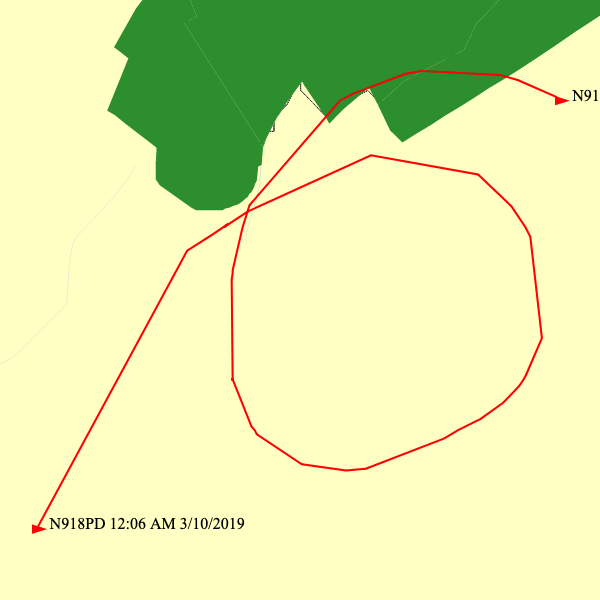

hand_coded_training_data/hover_train_png_even_more/ACBF73_2019-03-24_00_36_44_2019-03-24_00_41_42.png
actual: False; predicted: True


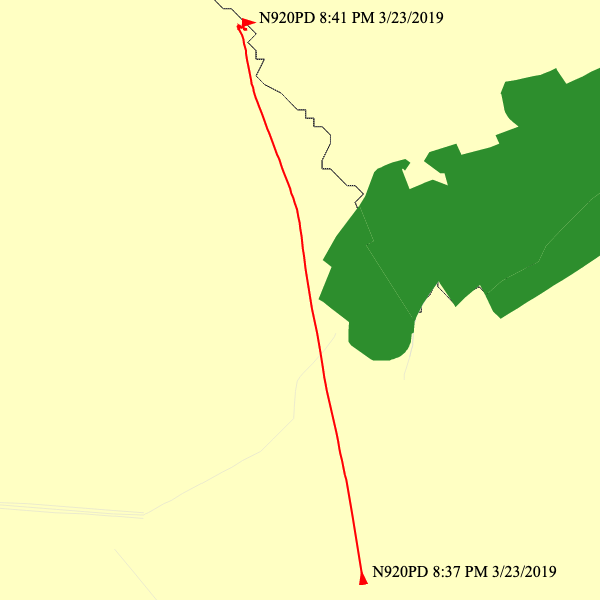

hand_coded_training_data/hover_train_png_more/ACBF73_2019-02-16_02_37_16_2019-02-16_02_41_46.png
actual: False; predicted: True


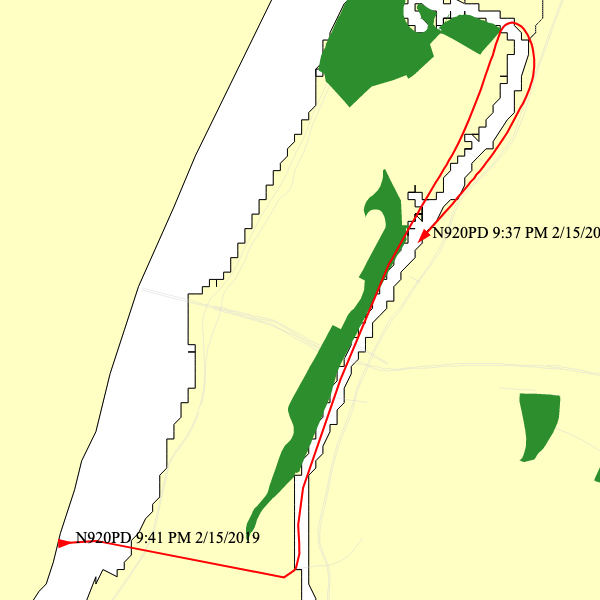

hand_coded_training_data/hover_train_png_all/ACB1F5_2019-02-01_04_49_10_2019-02-01_04_54_05.png
actual: False; predicted: True


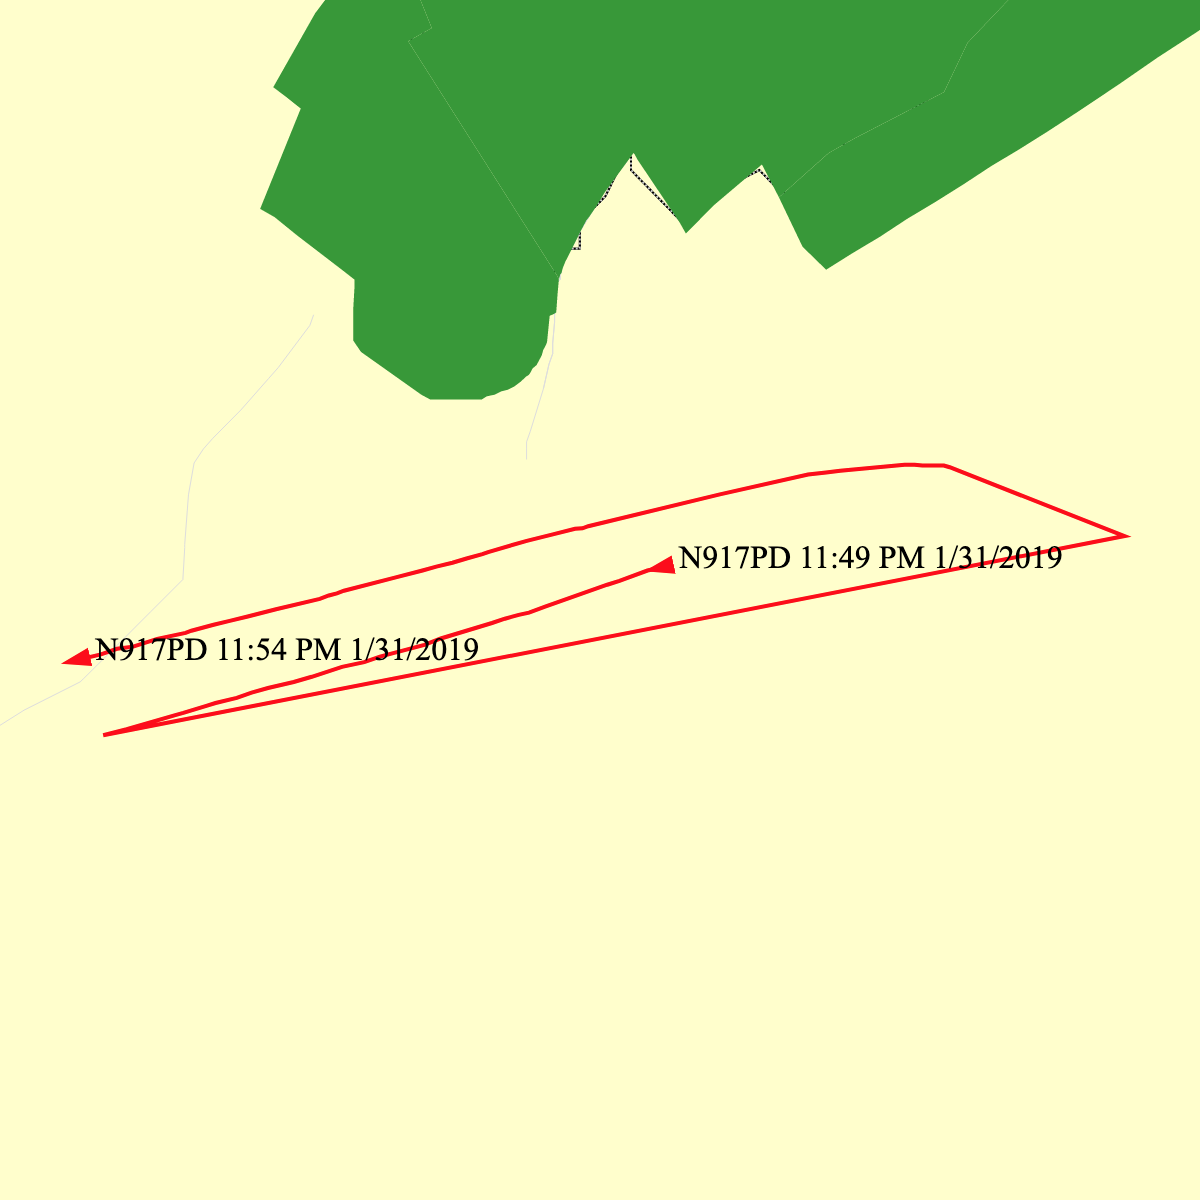

hand_coded_training_data/hover_train_png_all/ACB5AC_2019-02-05_01_16_30_2019-02-05_01_20_37.png
actual: False; predicted: True


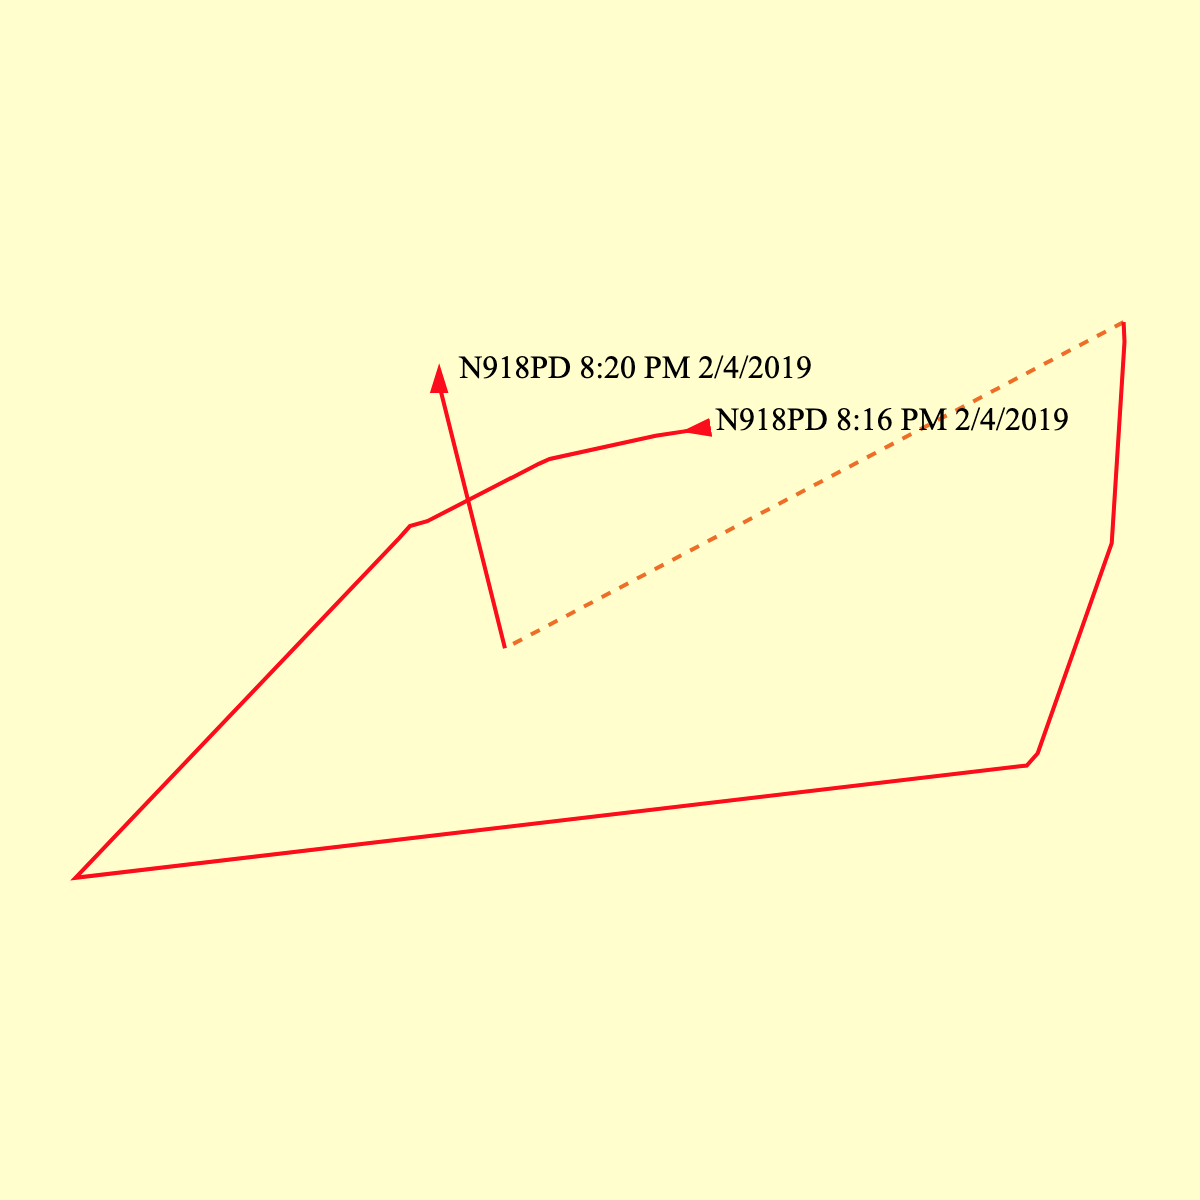

hand_coded_training_data/hover_train_png_more/ACB1F5_2019-03-06_06_03_34_2019-03-06_06_07_48.png
actual: False; predicted: True


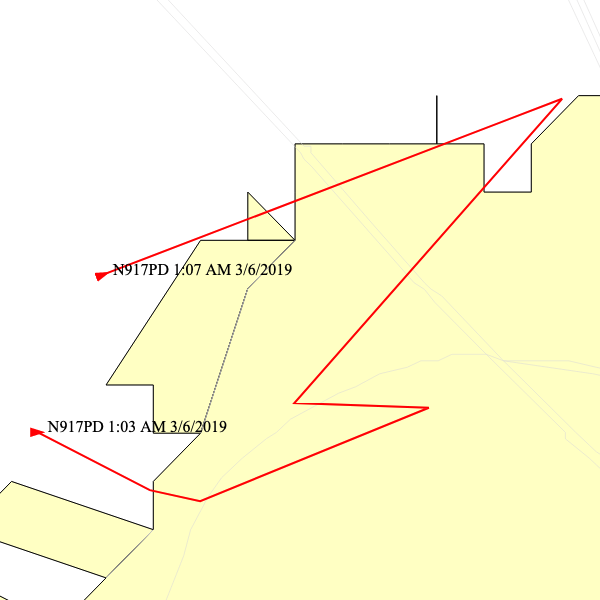

hand_coded_training_data/hover_train_png_more/ACB5AC_2019-03-14_04_44_52_2019-03-14_04_49_48.png
actual: False; predicted: True


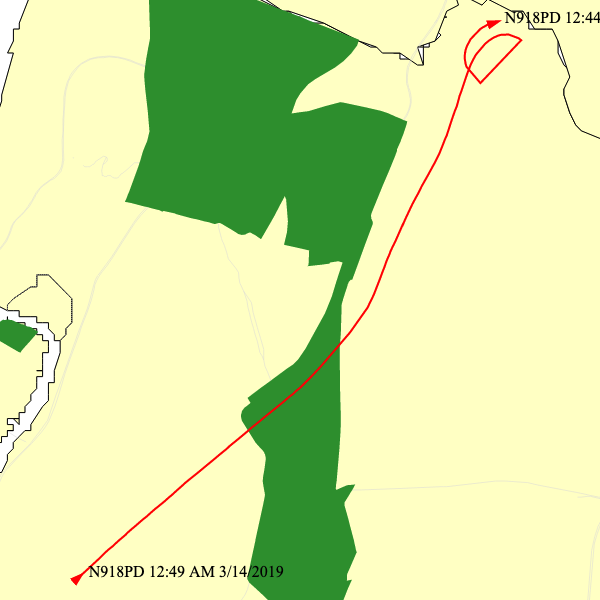

hand_coded_training_data/hover_train_png_more/ACB1F5_2019-03-07_22_11_42_2019-03-07_22_15_54.png
actual: False; predicted: True


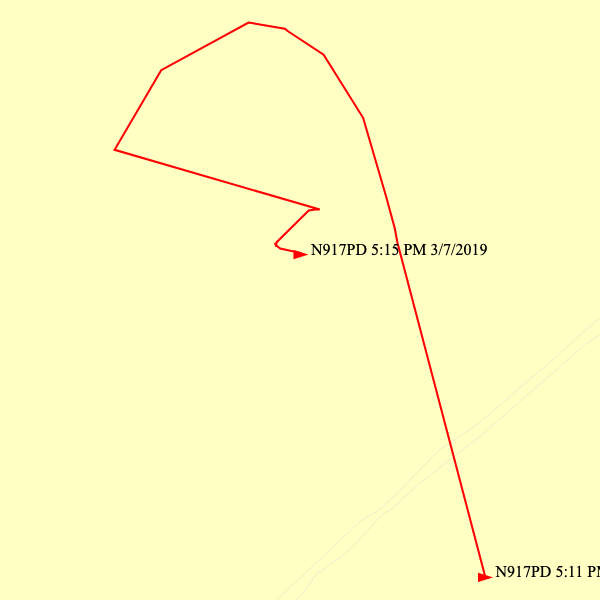

hand_coded_training_data/hover_train_png_all/ACB1F5_2019-01-26_15_07_06_2019-01-26_15_12_06.png
actual: False; predicted: True


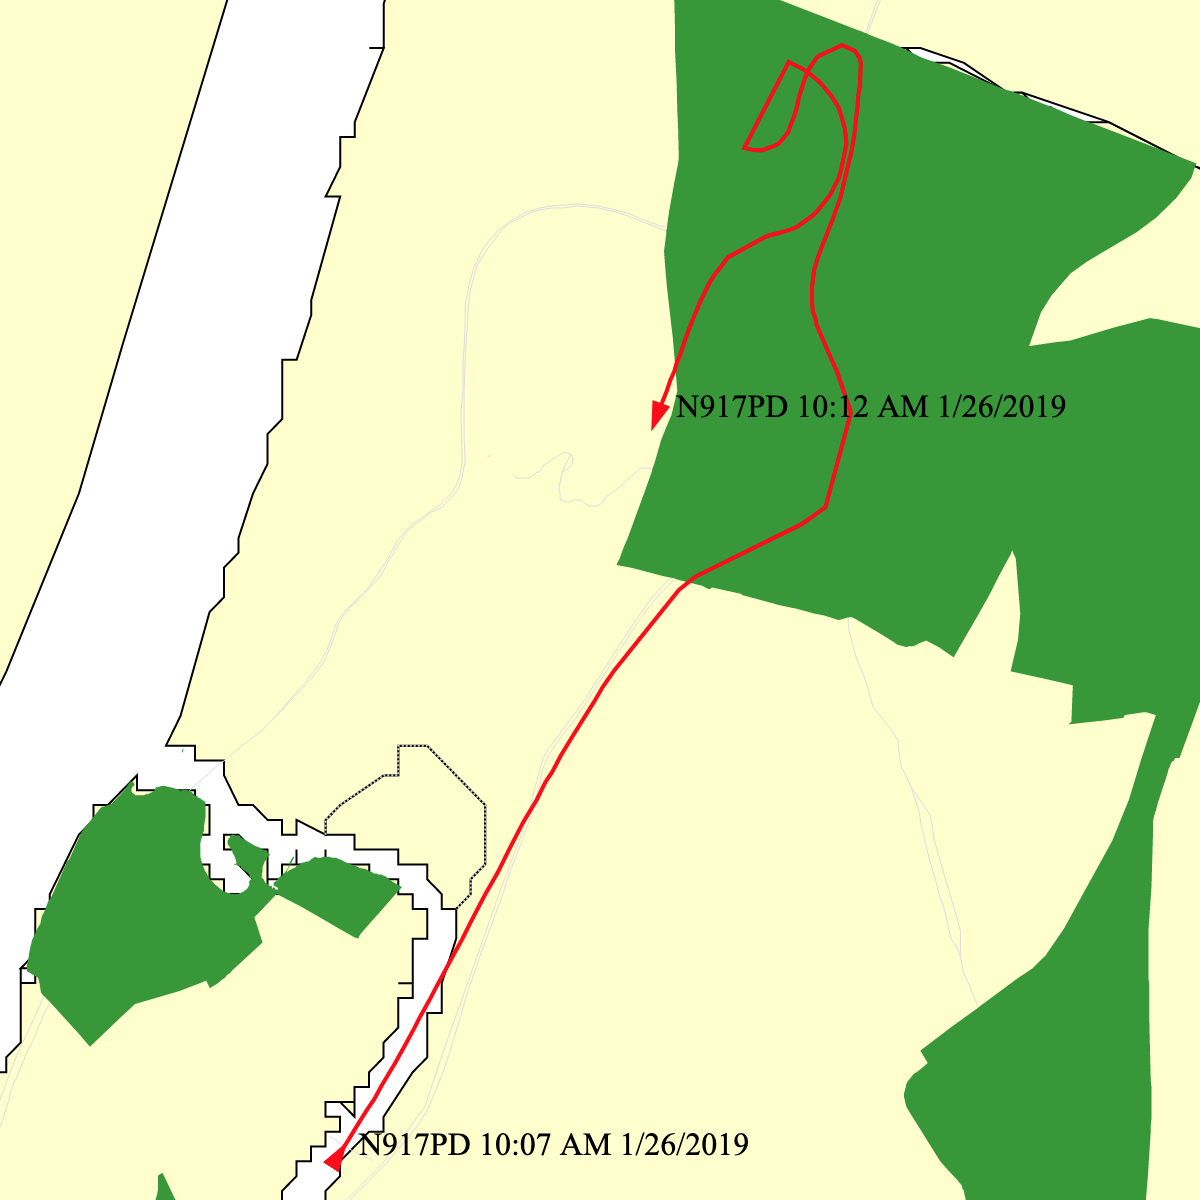

hand_coded_training_data/hover_train_png_even_more/ACBF73_2019-03-24_20_54_27_2019-03-24_20_59_27.png
actual: False; predicted: True


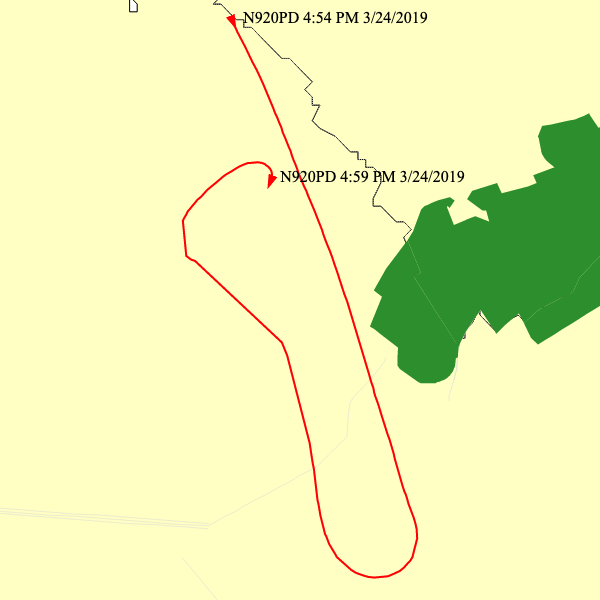

hand_coded_training_data/hover_train_png_even_more/ACB1F5_2019-03-25_13_43_10_2019-03-25_13_48_10.png
actual: False; predicted: True


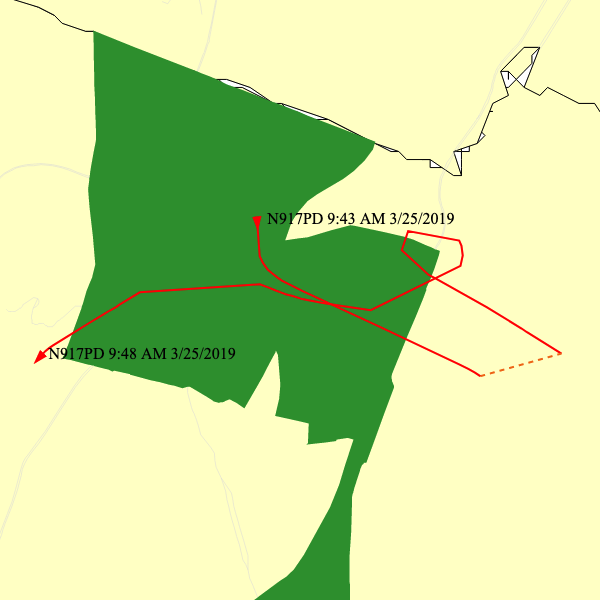

hand_coded_training_data/hover_train_png_all/ACB5AC_2019-02-05_01_46_12_2019-02-05_01_51_05.png
actual: False; predicted: True


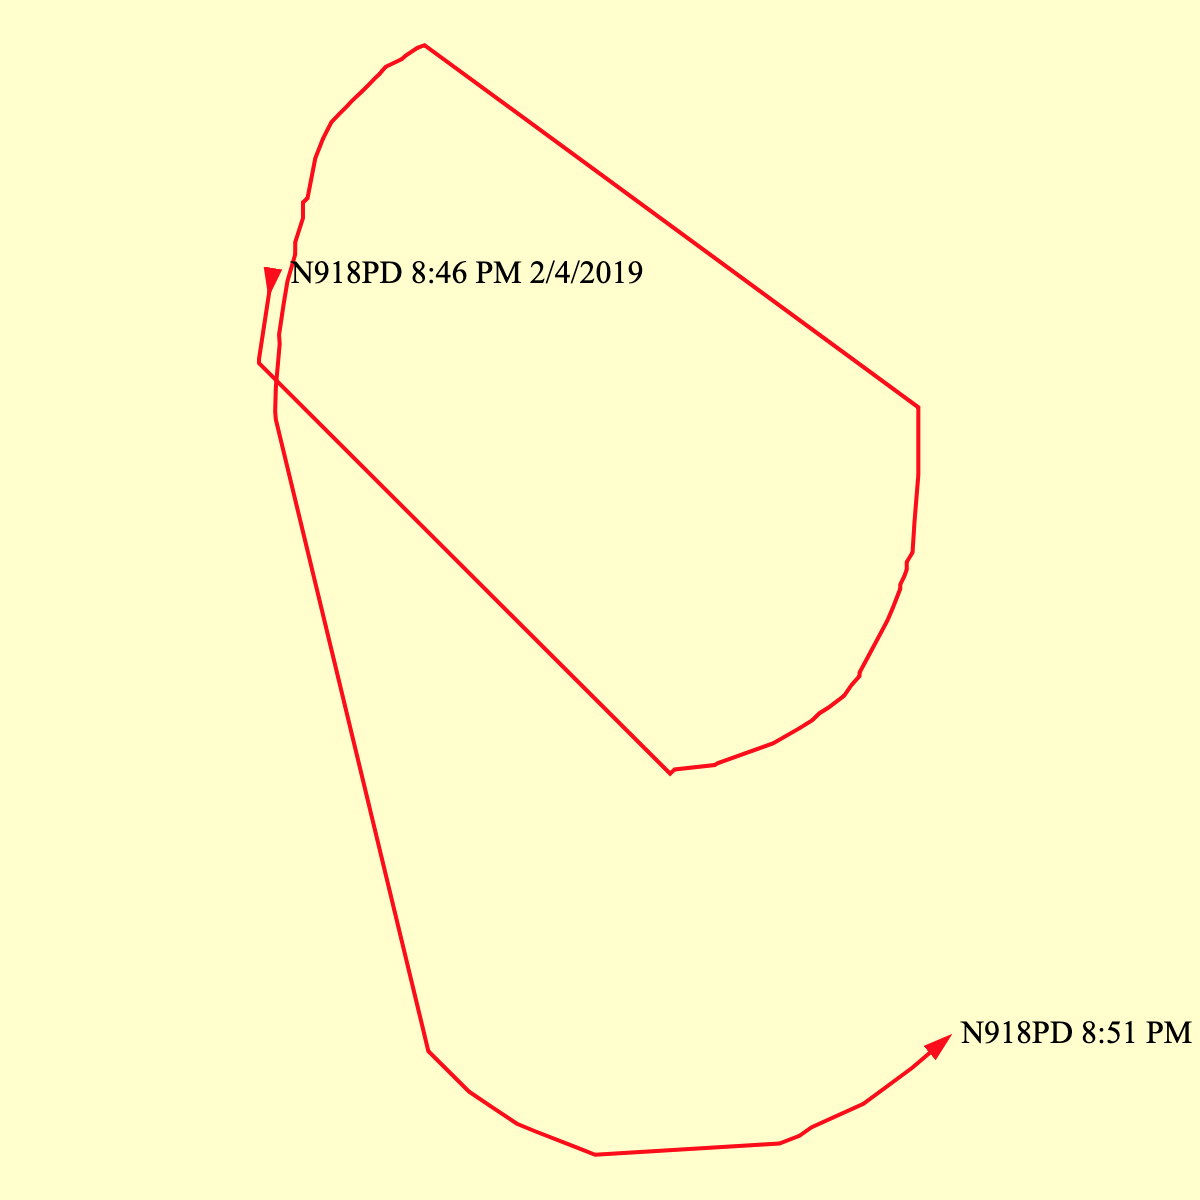

hand_coded_training_data/hover_train_png_even_more/ACBF73_2019-03-28_12_52_50_2019-03-28_12_57_38.png
actual: False; predicted: True


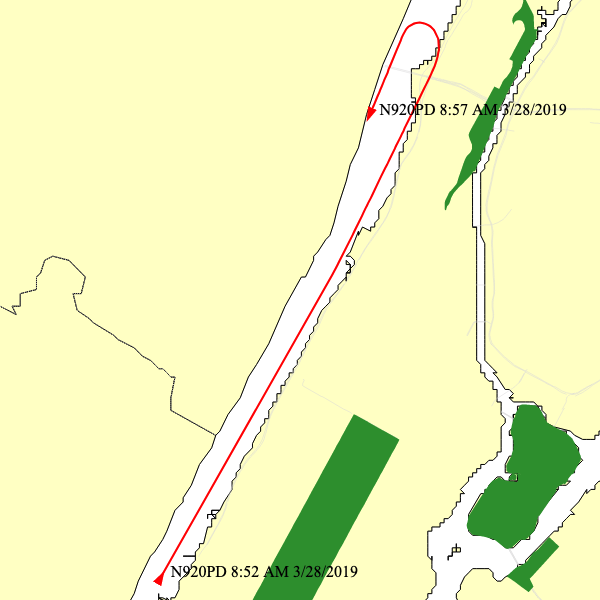

hand_coded_training_data/hover_train_png_all/ACBF73_2019-01-22_16_58_54_2019-01-22_17_03_10.png
actual: False; predicted: True


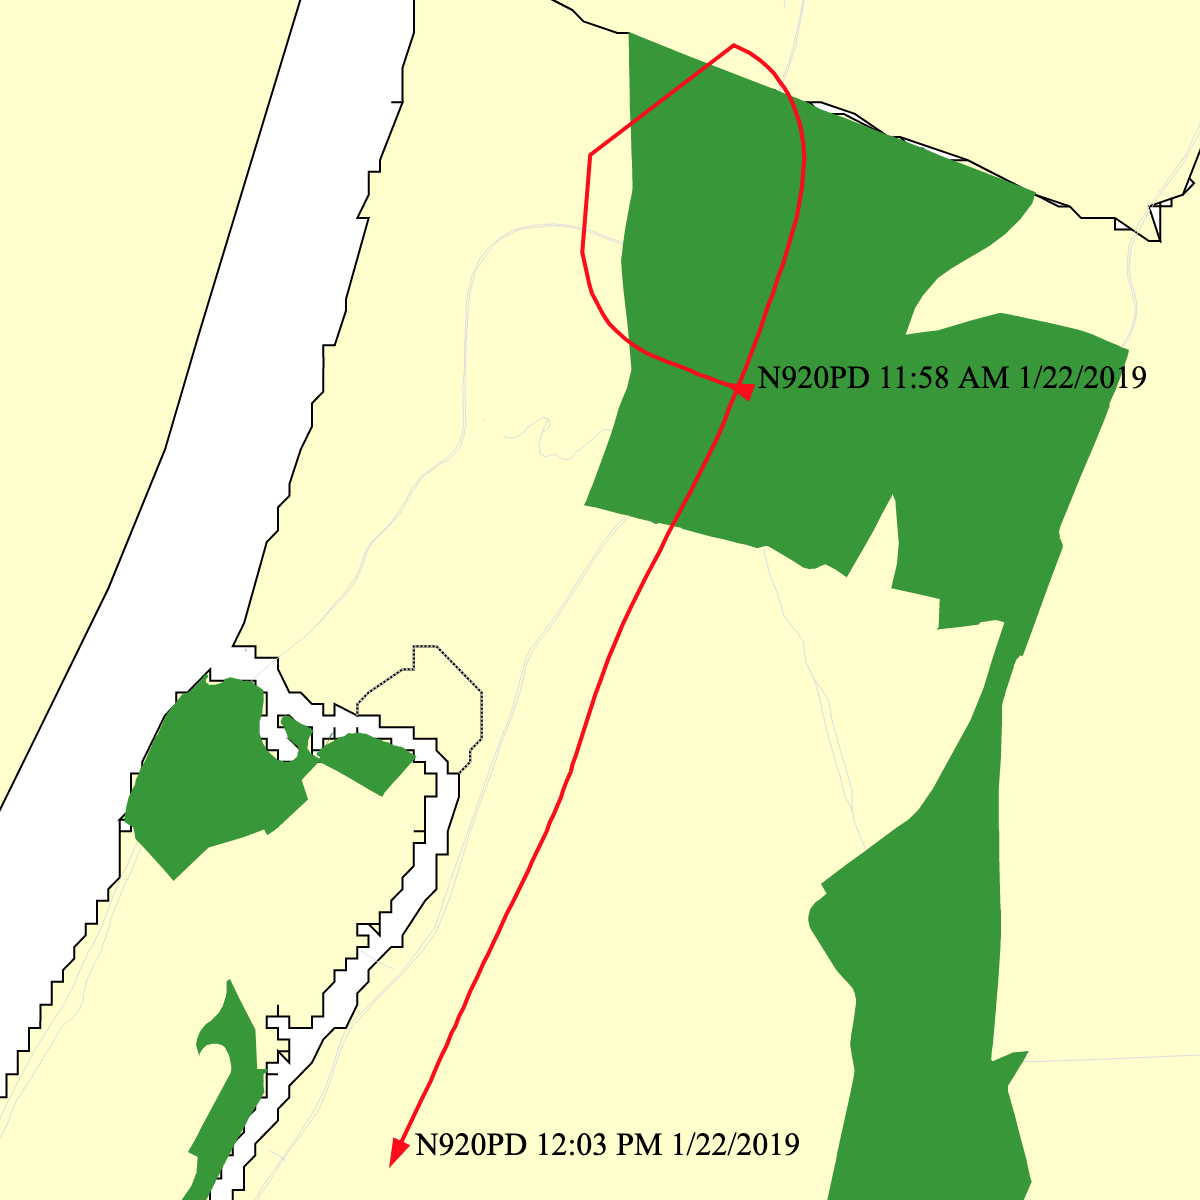

hand_coded_training_data/hover_train_png_more/ACB5AC_2019-03-14_19_25_50_2019-03-14_19_30_43.png
actual: False; predicted: True


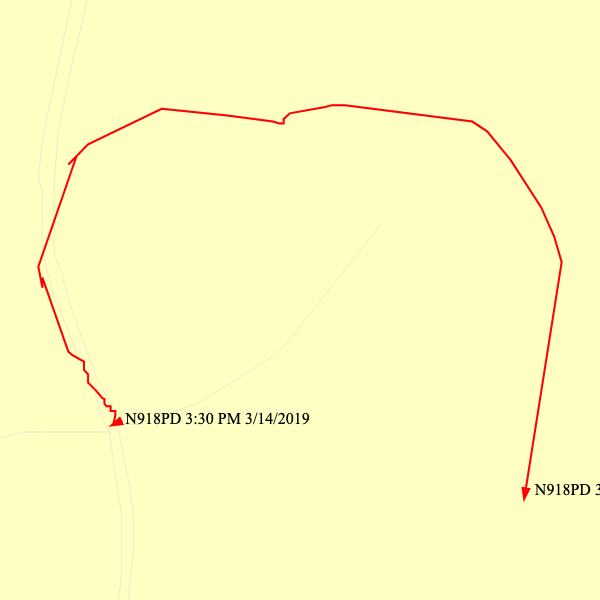

hand_coded_training_data/hover_train_png_more/ACB1F5_2019-03-05_17_26_25_2019-03-05_17_31_23.png
actual: True; predicted: False


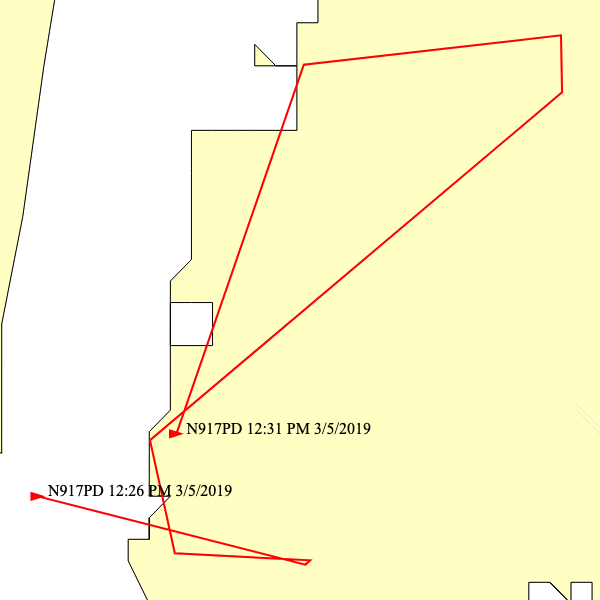

hand_coded_training_data/hover_train_png_even_more/A65CA8_2019-03-13_21_30_13_2019-03-13_21_34_25.png
actual: False; predicted: True


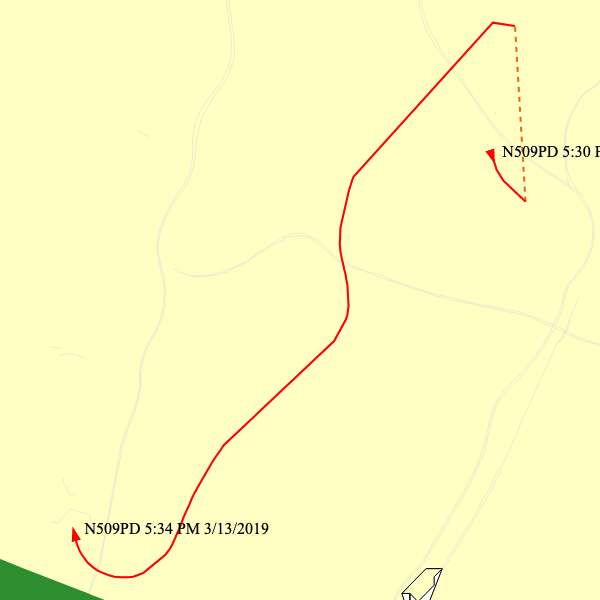

hand_coded_training_data/hover_train_png_even_more/ACBF73_2019-03-21_00_20_14_2019-03-21_00_25_13.png
actual: False; predicted: True


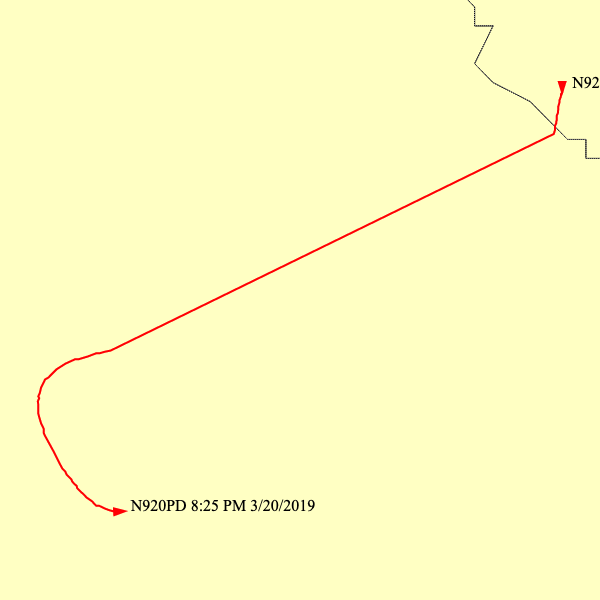

hand_coded_training_data/hover_train_png_more/ACB1F5_2019-03-08_15_24_08_2019-03-08_15_28_24.png
actual: False; predicted: True


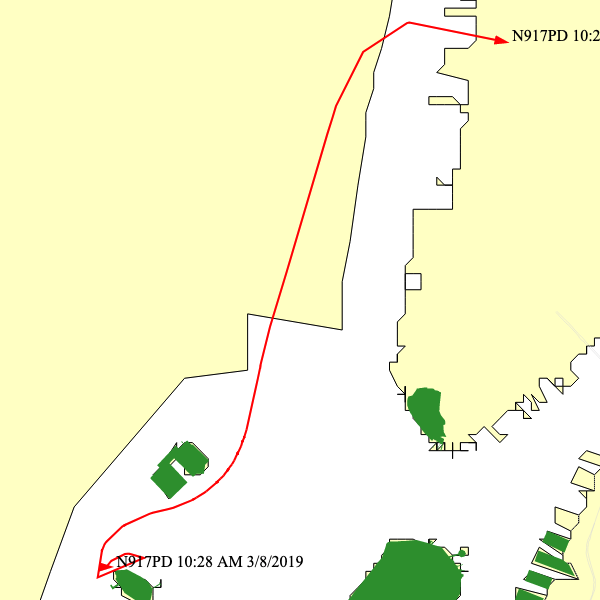

hand_coded_training_data/hover_train_png_all/ACB5AC_2019-02-05_01_41_13_2019-02-05_01_46_12.png
actual: False; predicted: True


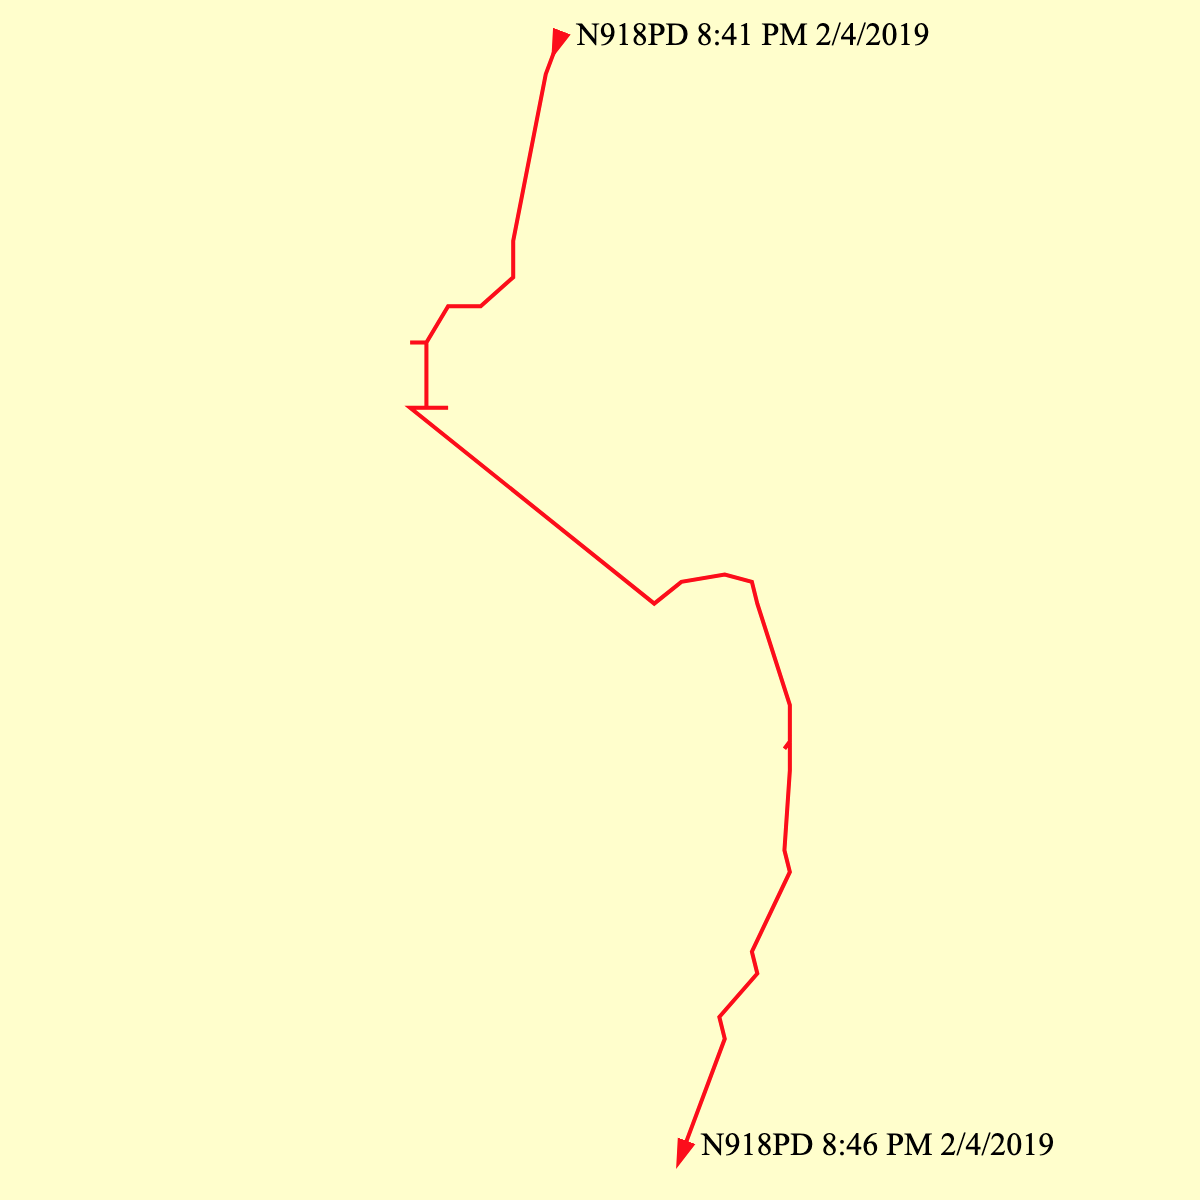

hand_coded_training_data/hover_train_png_more/ACB5AC_2019-03-12_21_17_58_2019-03-12_21_19_43.png
actual: False; predicted: True


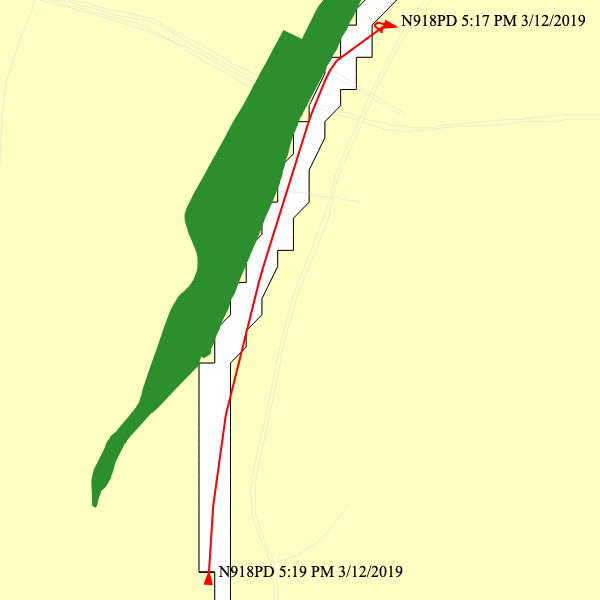

hand_coded_training_data/hover_train_png_even_more/ACBF73_2019-03-26_04_41_00_2019-03-26_04_45_57.png
actual: False; predicted: True


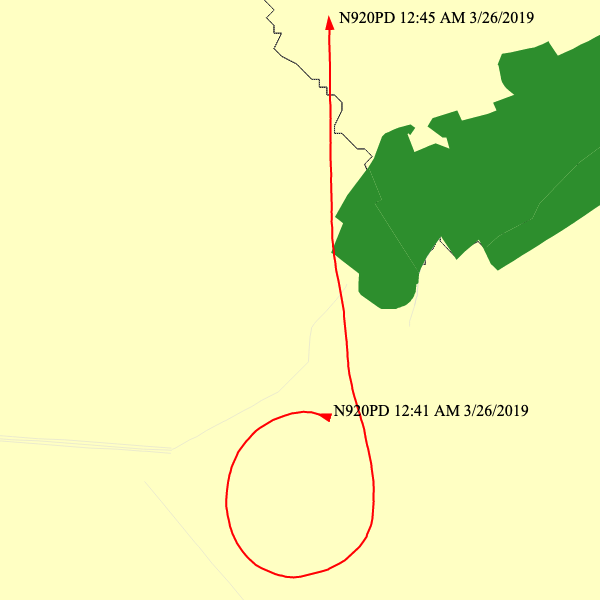

hand_coded_training_data/hover_train_png_all/ACB5AC_2019-02-02_18_20_43_2019-02-02_18_24_38.png
actual: False; predicted: True


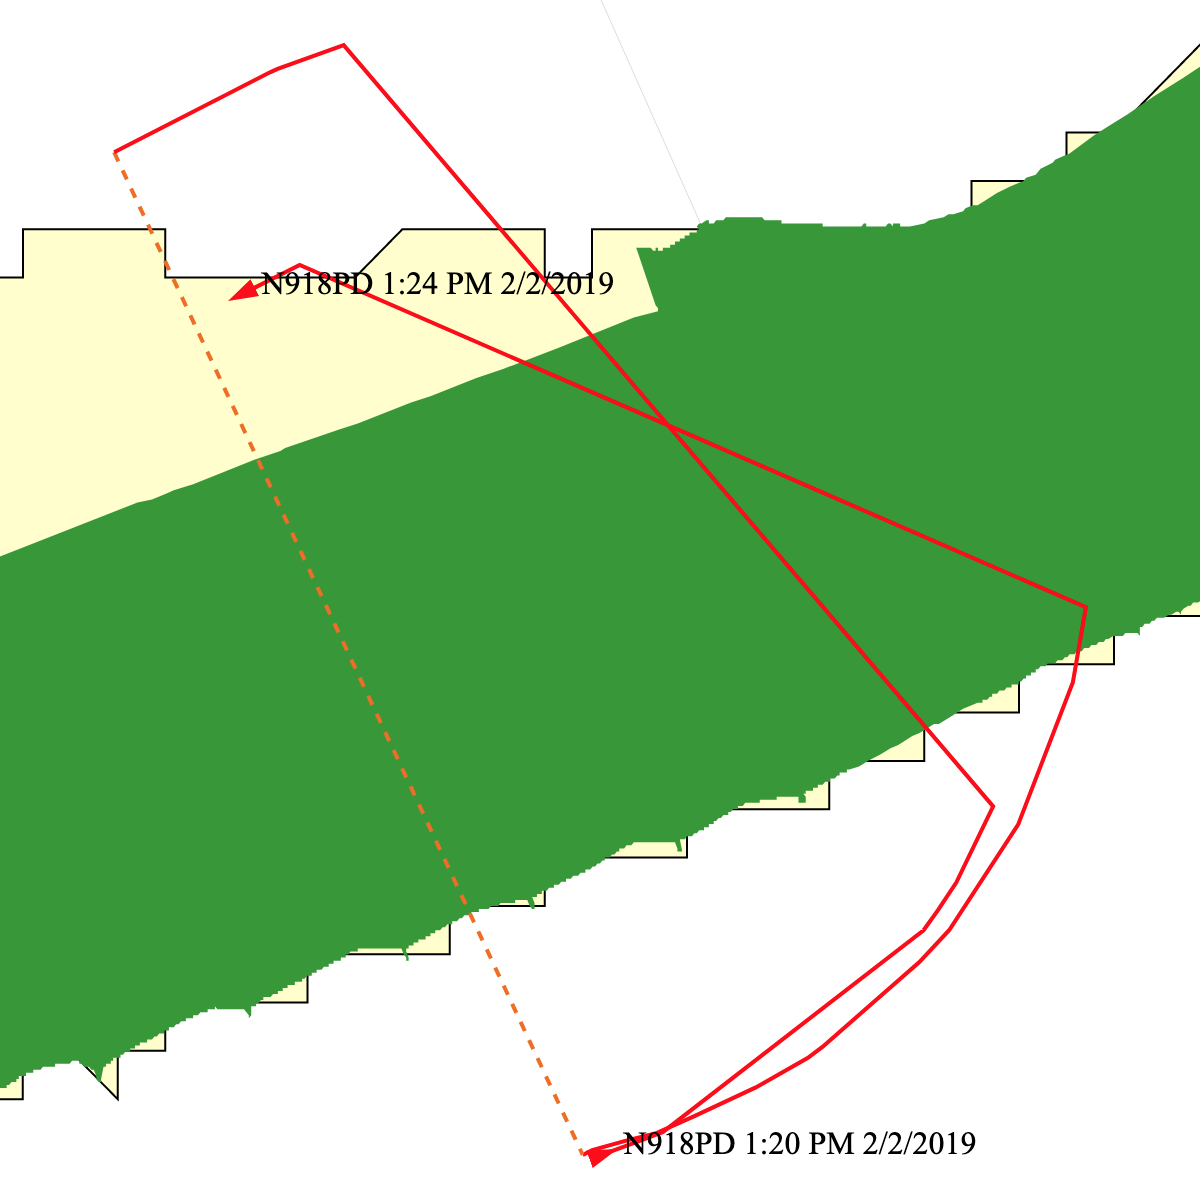

hand_coded_training_data/hover_train_png_even_more/ACBF73_2019-03-27_06_50_47_2019-03-27_06_54_28.png
actual: False; predicted: True


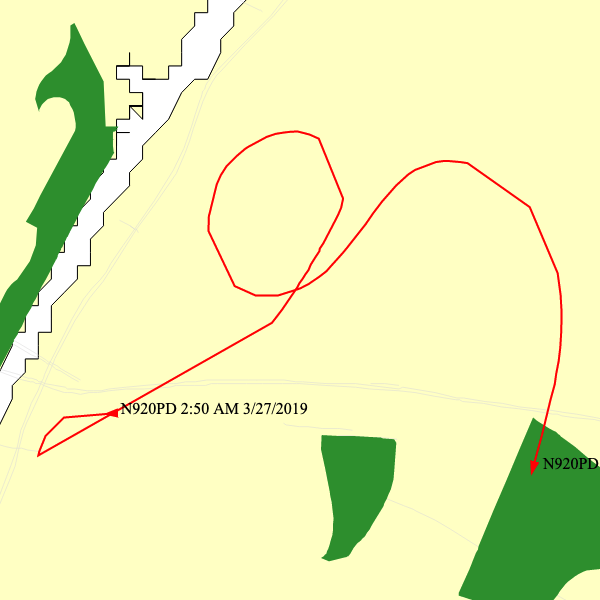

hand_coded_training_data/hover_train_png_all/ACB5AC_2019-02-04_18_09_45_2019-02-04_18_12_49.png
actual: False; predicted: True


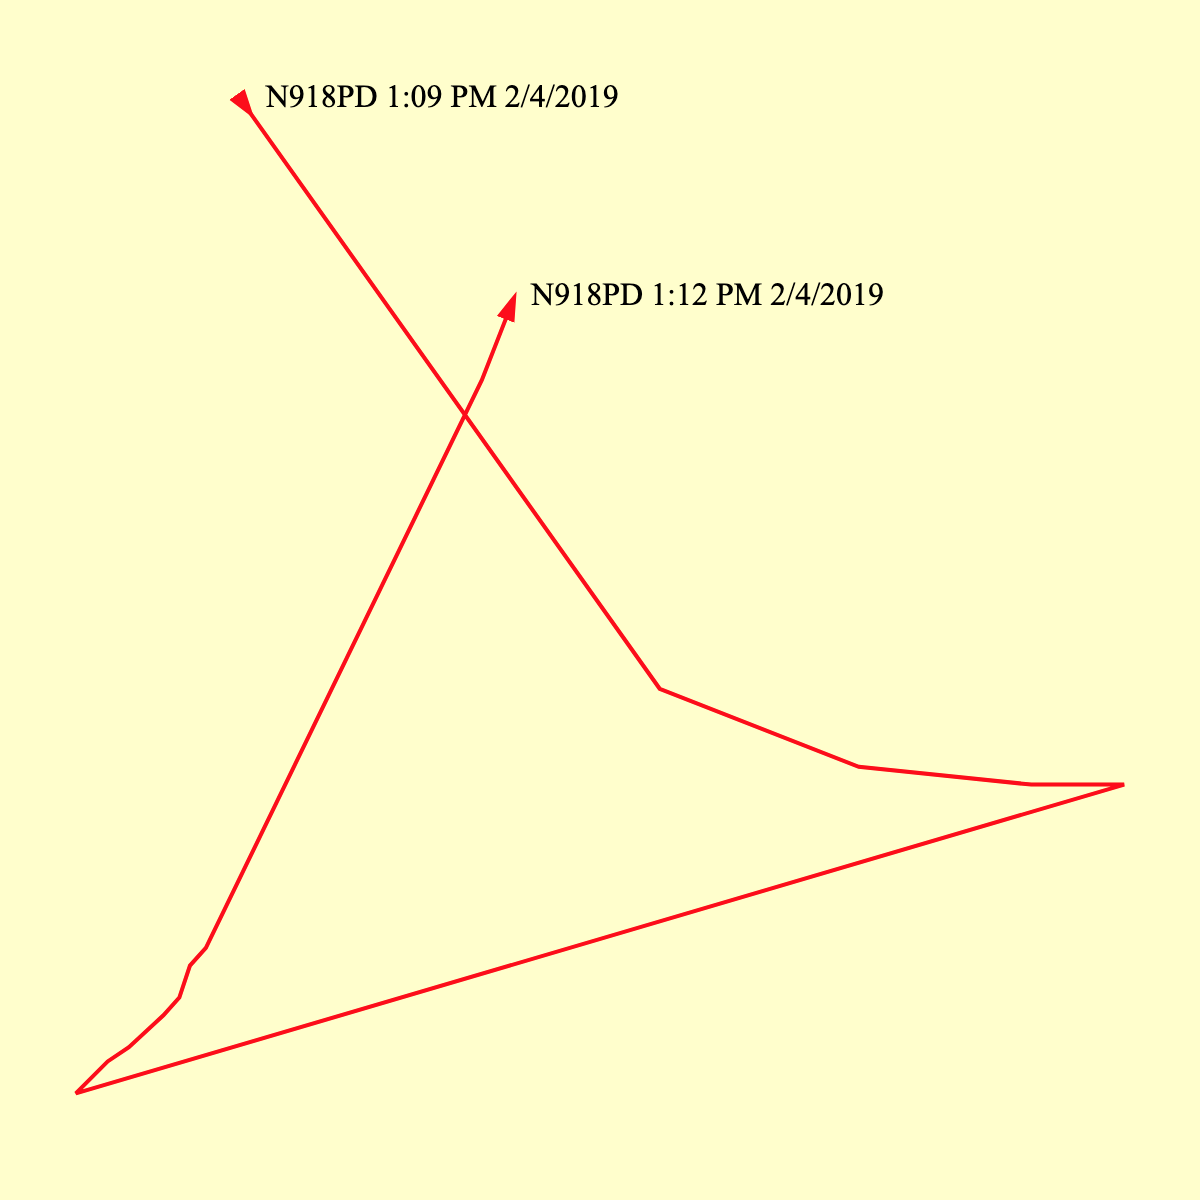

hand_coded_training_data/hover_train_png_even_more/ACB1F5_2019-03-25_13_40_40_2019-03-25_13_45_36.png
actual: False; predicted: True


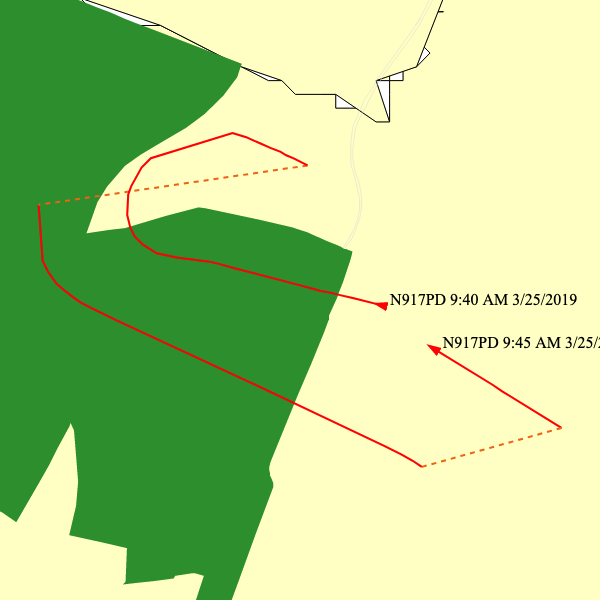

hand_coded_training_data/hover_train_png_even_more/ACBF73_2019-03-27_03_43_35_2019-03-27_03_48_34.png
actual: True; predicted: False


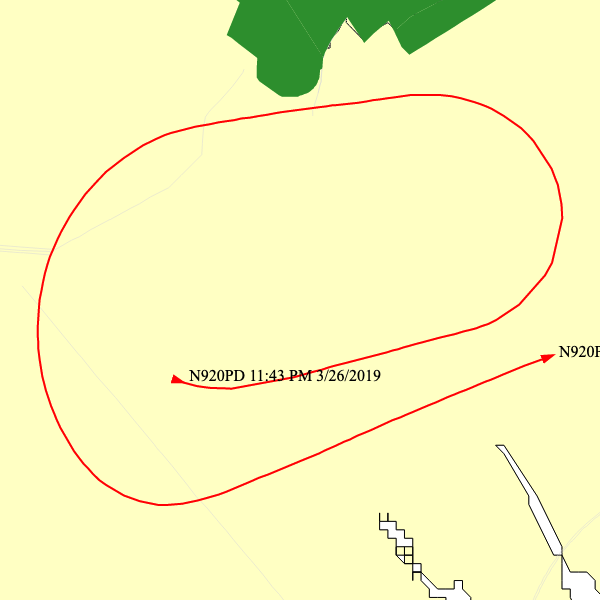

hand_coded_training_data/hover_train_png_even_more/A65CA8_2019-03-15_01_09_28_2019-03-15_01_11_18.png
actual: False; predicted: True


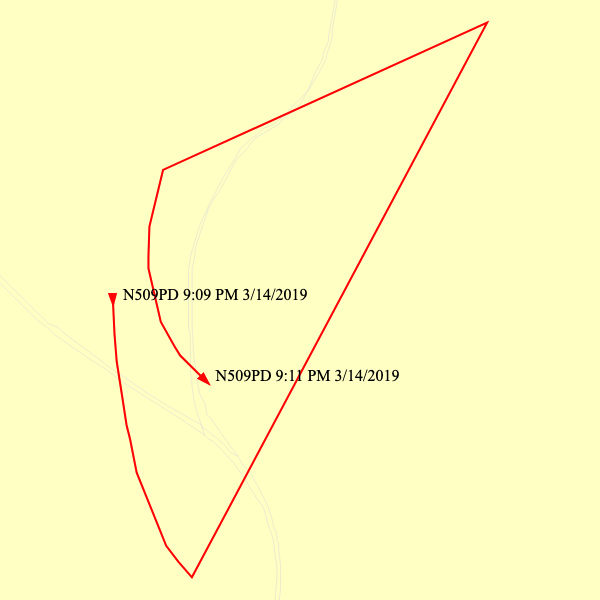

hand_coded_training_data/hover_train_png_even_more/ACBF73_2019-03-27_02_12_55_2019-03-27_02_17_51.png
actual: False; predicted: True


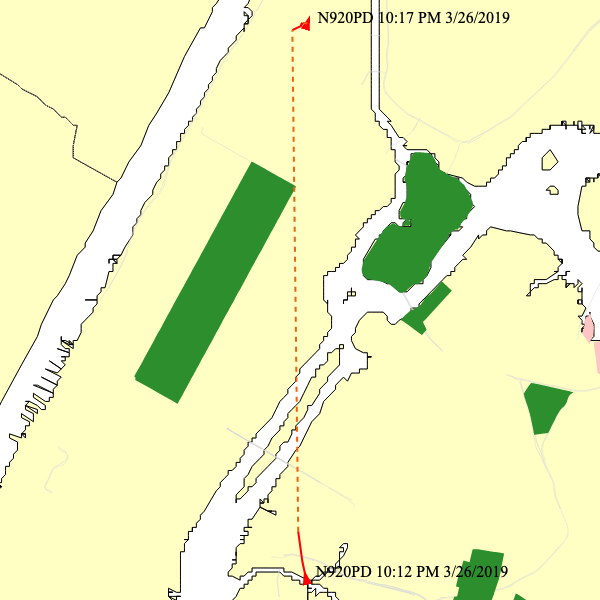

hand_coded_training_data/hover_train_png_more/ACBF73_2019-02-16_02_55_00_2019-02-16_02_58_04.png
actual: False; predicted: True


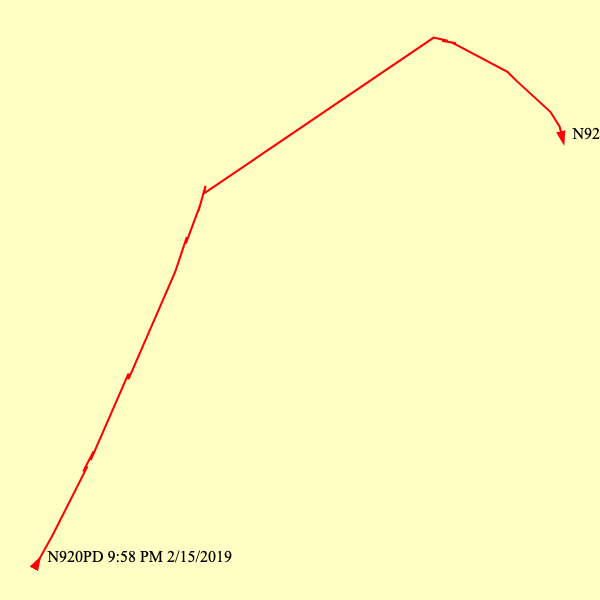

hand_coded_training_data/hover_train_png_all/ACB5AC_2019-02-03_18_32_35_2019-02-03_18_36_17.png
actual: False; predicted: True


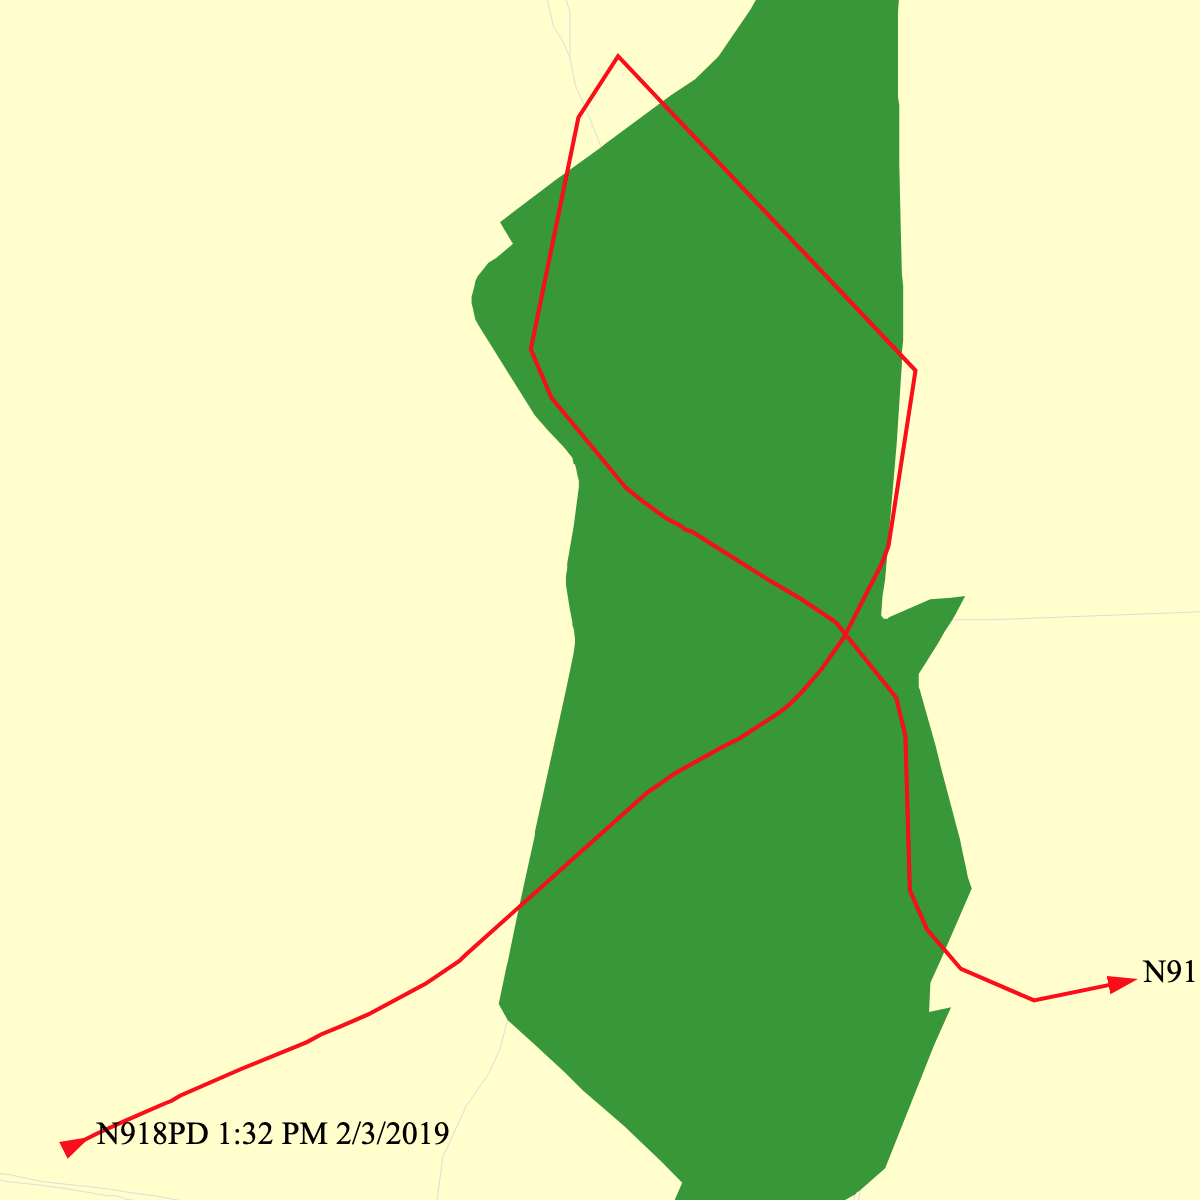

hand_coded_training_data/hover_train_png_all/ACBF73_2019-02-02_06_31_22_2019-02-02_06_35_29.png
actual: False; predicted: True


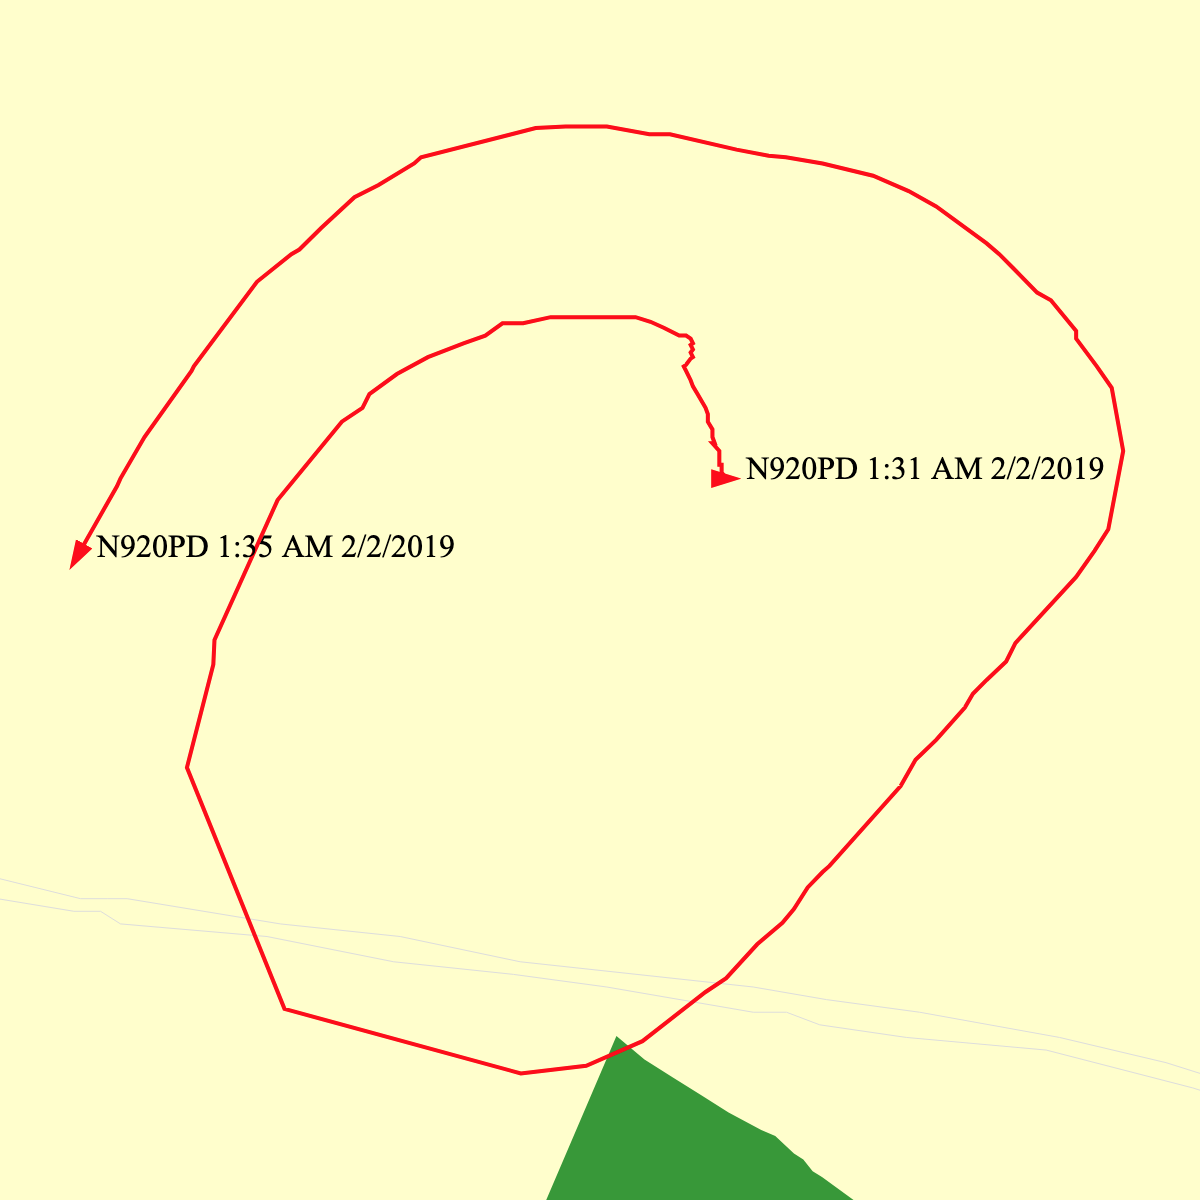

hand_coded_training_data/hover_train_png_even_more/A65CA8_2019-03-12_21_29_03_2019-03-12_21_31_55.png
actual: False; predicted: True


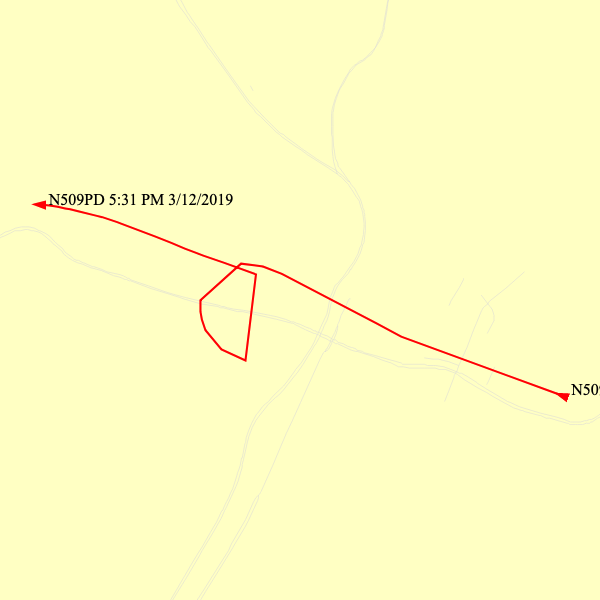

hand_coded_training_data/hover_train_png_more/ACB5AC_2019-03-12_21_17_22_2019-03-12_21_19_43.png
actual: False; predicted: True


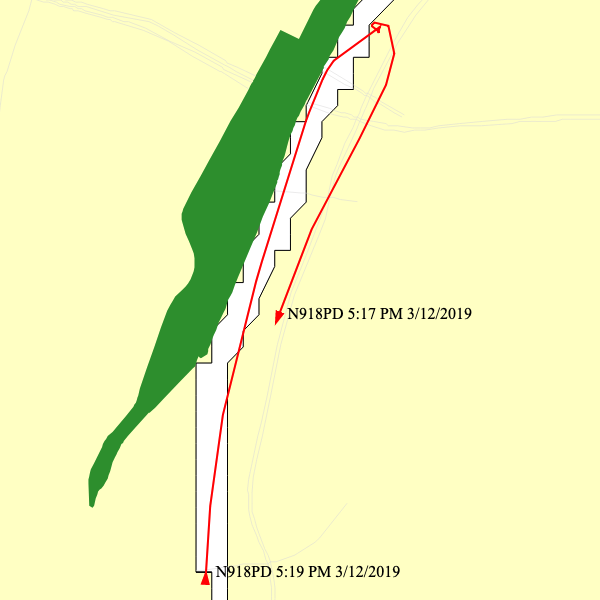

hand_coded_training_data/hover_train_png_more/ACB5AC_2019-03-12_05_18_09_2019-03-12_05_22_14.png
actual: True; predicted: False


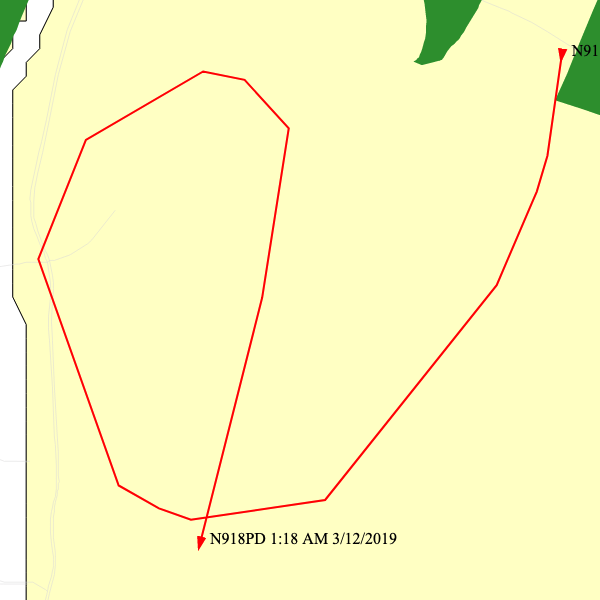

hand_coded_training_data/hover_train_png_even_more/ACBF73_2019-03-24_00_34_12_2019-03-24_00_39_12.png
actual: False; predicted: True


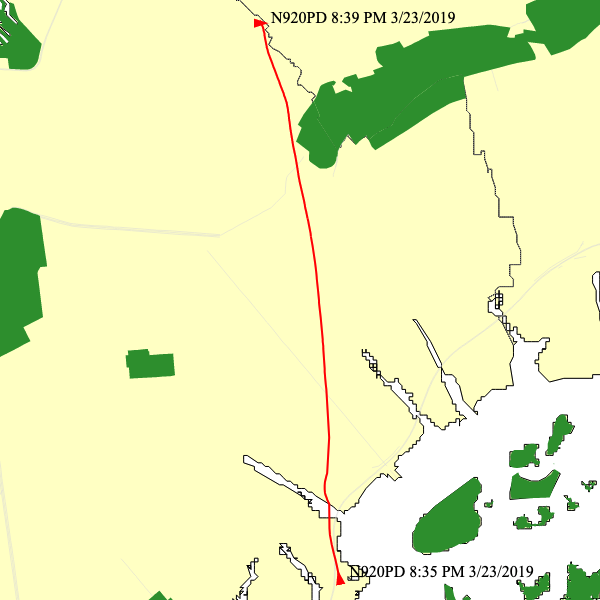

hand_coded_training_data/hover_train_png_more/ACBF73_2019-02-16_09_32_14_2019-02-16_09_36_50.png
actual: False; predicted: True


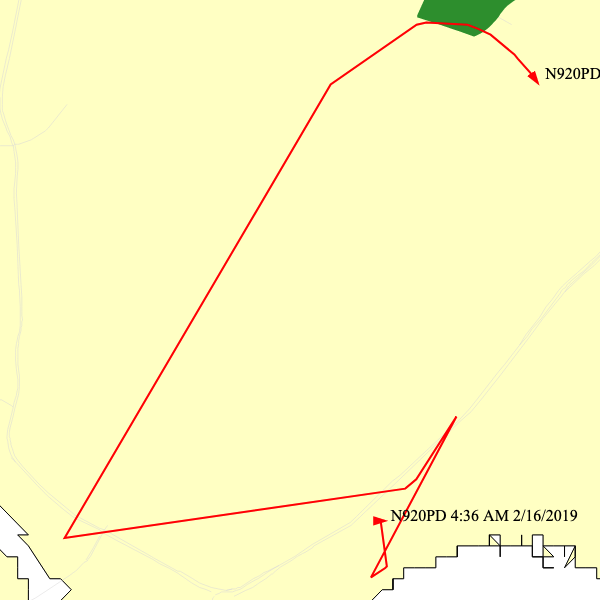

hand_coded_training_data/hover_train_png_more/ACB5AC_2019-03-13_03_59_21_2019-03-13_04_04_04.png
actual: False; predicted: True


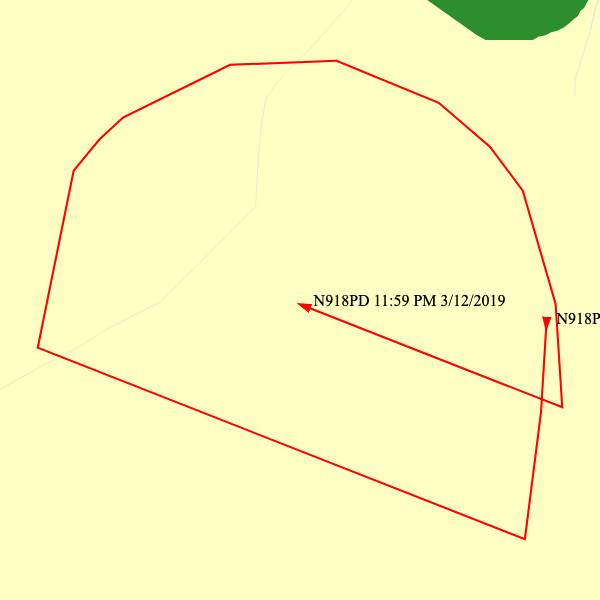

hand_coded_training_data/hover_train_png_more/ACBF73_2019-03-03_06_29_19_2019-03-03_06_33_15.png
actual: False; predicted: True


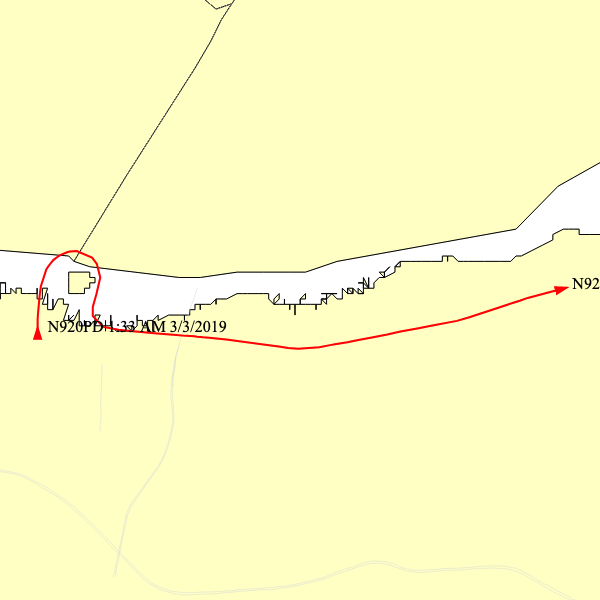

hand_coded_training_data/hover_train_png_even_more/ACBF73_2019-03-28_12_42_42_2019-03-28_12_47_33.png
actual: False; predicted: True


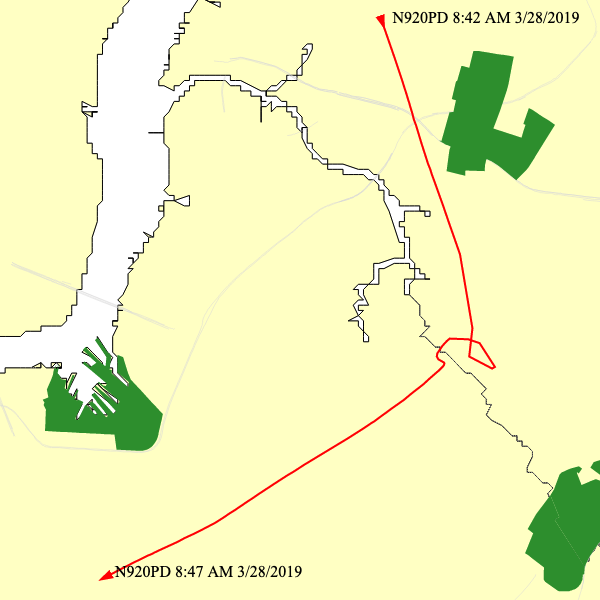

hand_coded_training_data/hover_train_png_even_more/ACBF73_2019-03-28_04_03_21_2019-03-28_04_08_21.png
actual: False; predicted: True


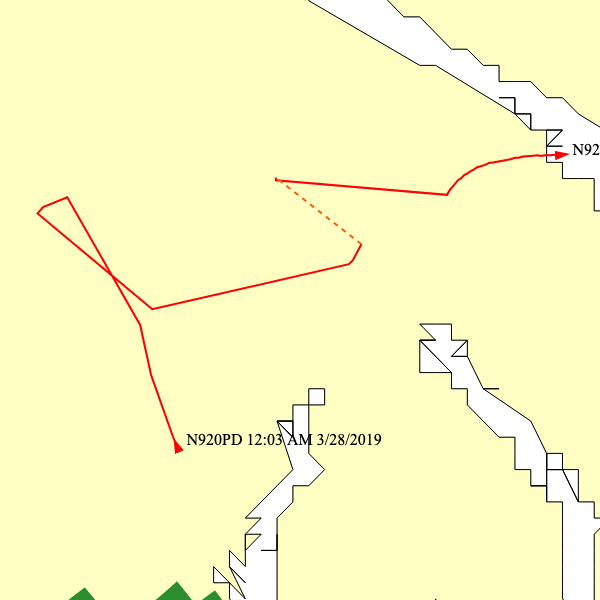

hand_coded_training_data/hover_train_png_more/ACB5AC_2019-03-14_17_39_53_2019-03-14_17_43_32.png
actual: False; predicted: True


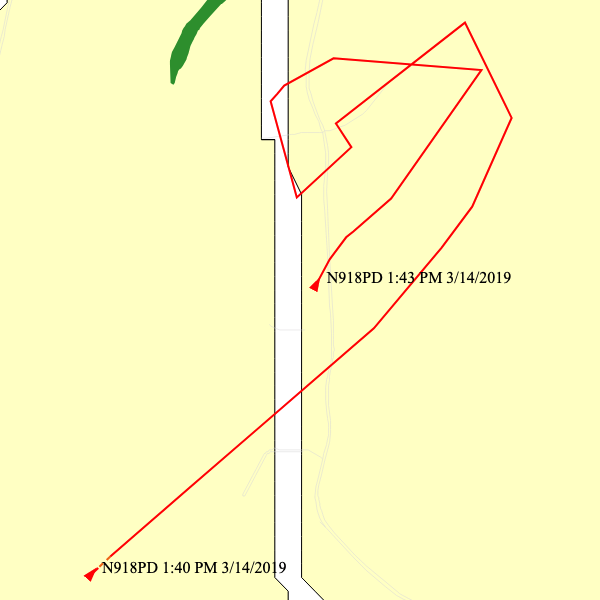

hand_coded_training_data/hover_train_png_all/ACB5AC_2019-02-05_17_56_32_2019-02-05_18_01_13.png
actual: False; predicted: True


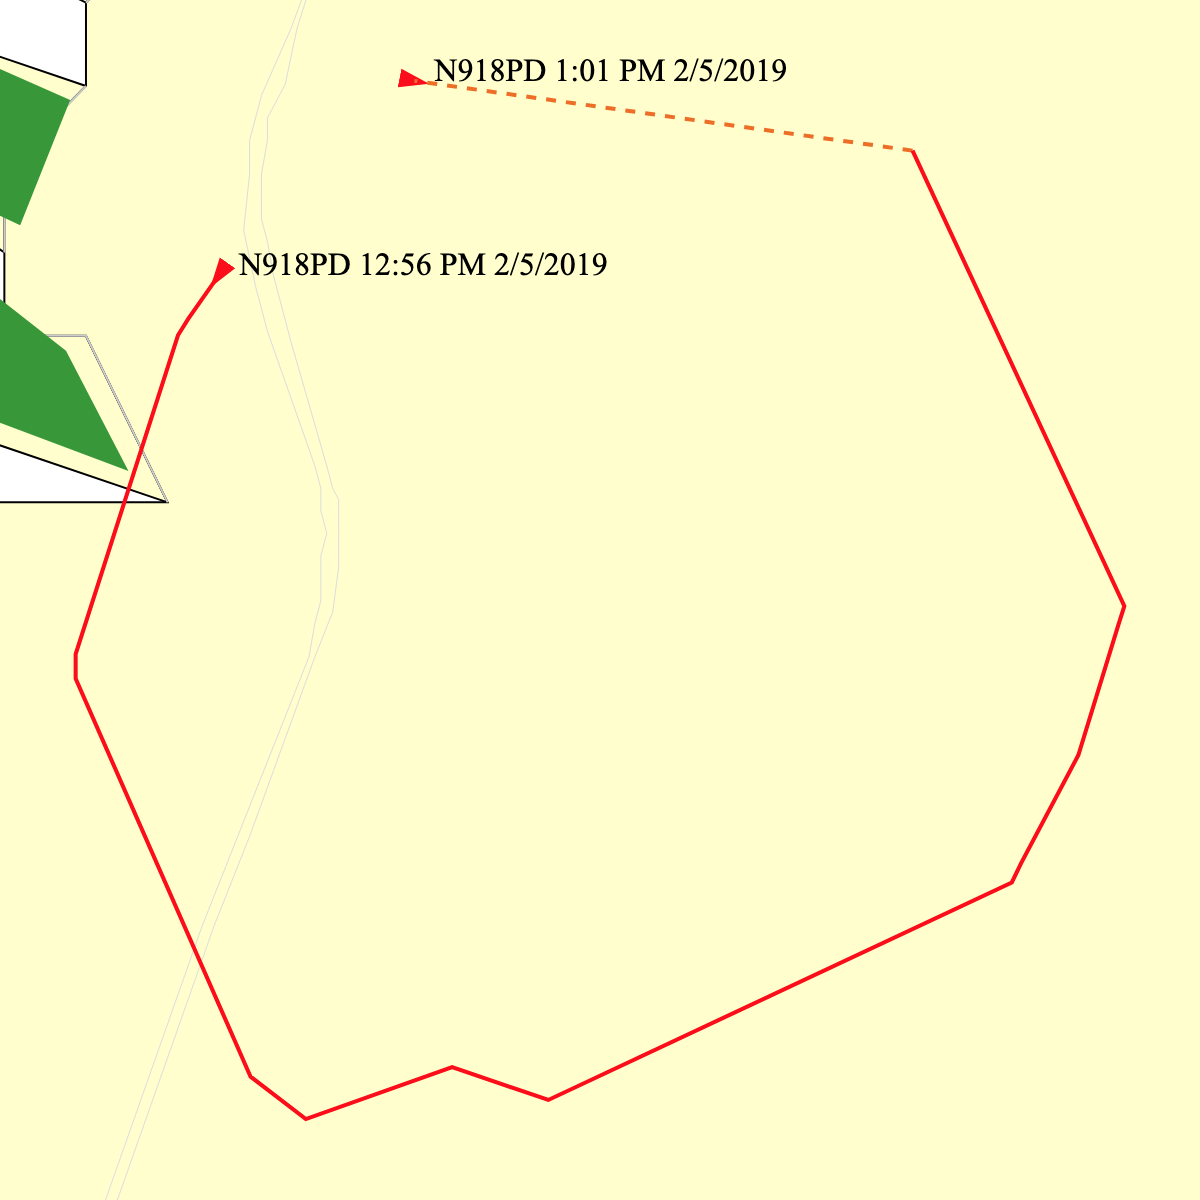

hand_coded_training_data/hover_train_png_all/ACB1F5_2019-01-31_18_34_37_2019-01-31_18_37_56.png
actual: False; predicted: True


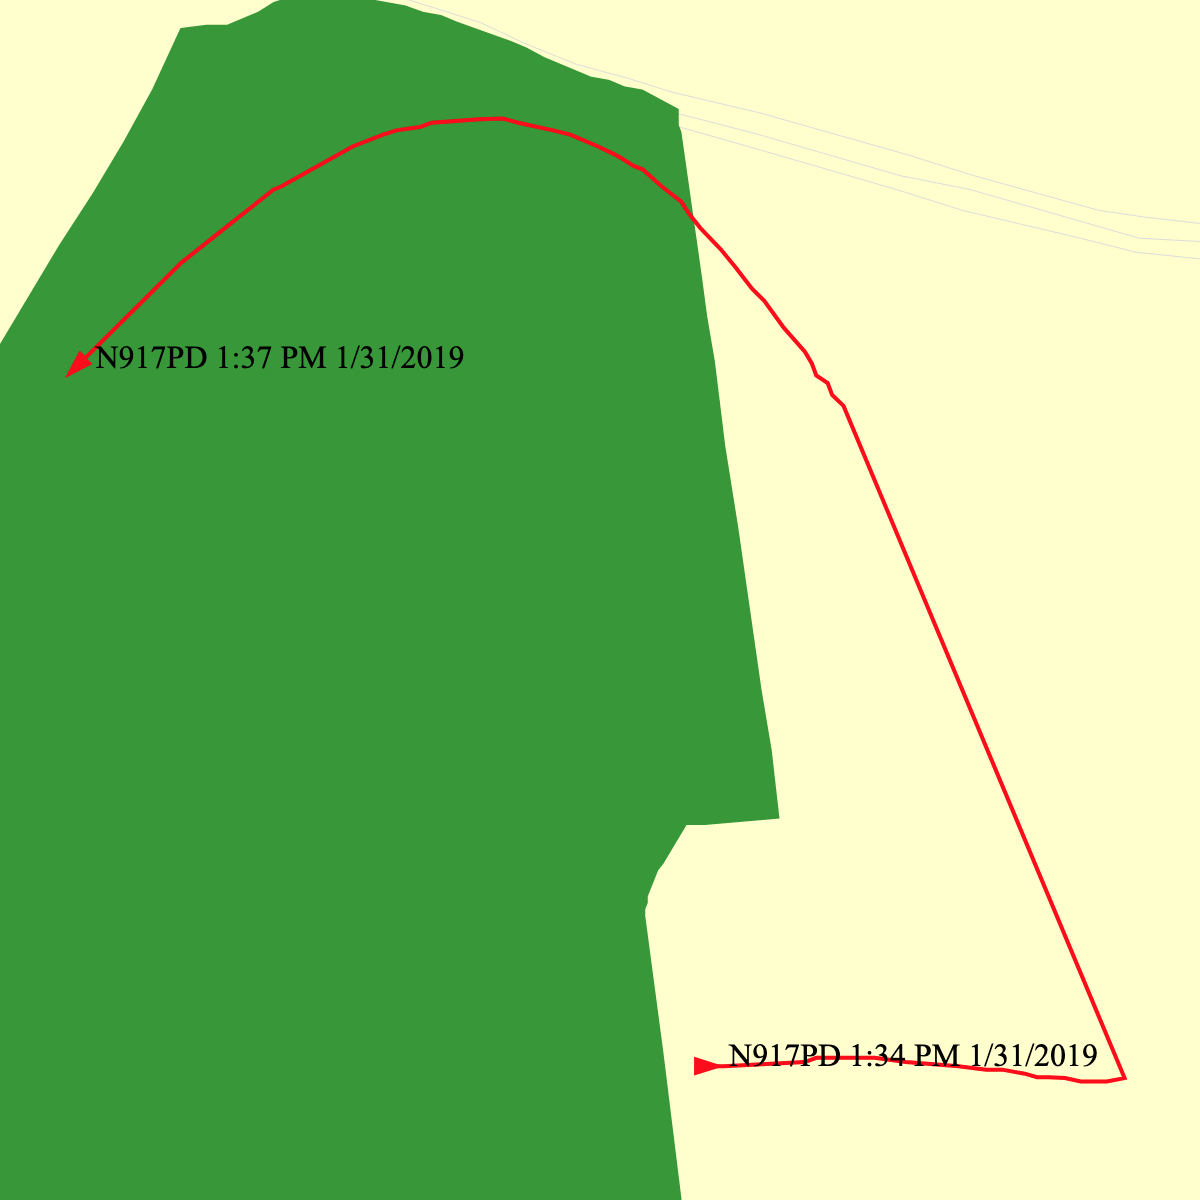

hand_coded_training_data/hover_train_png_all/ACBF73_2019-02-02_04_44_16_2019-02-02_04_48_49.png
actual: False; predicted: True


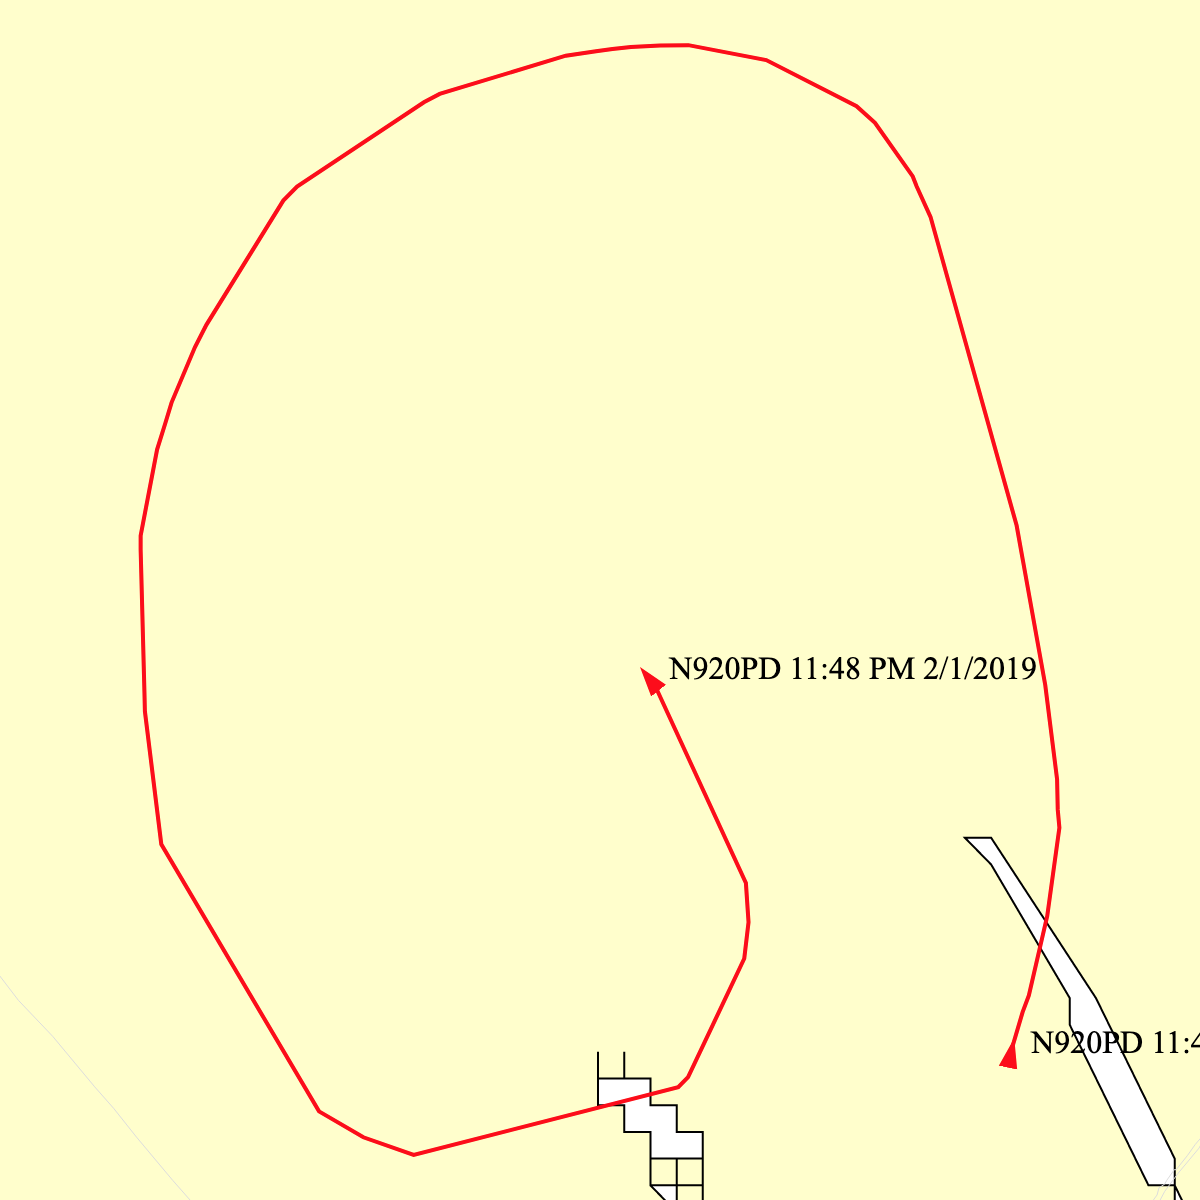

hand_coded_training_data/hover_train_png_more/ACB5AC_2019-03-12_12_54_57_2019-03-12_12_59_35.png
actual: False; predicted: True


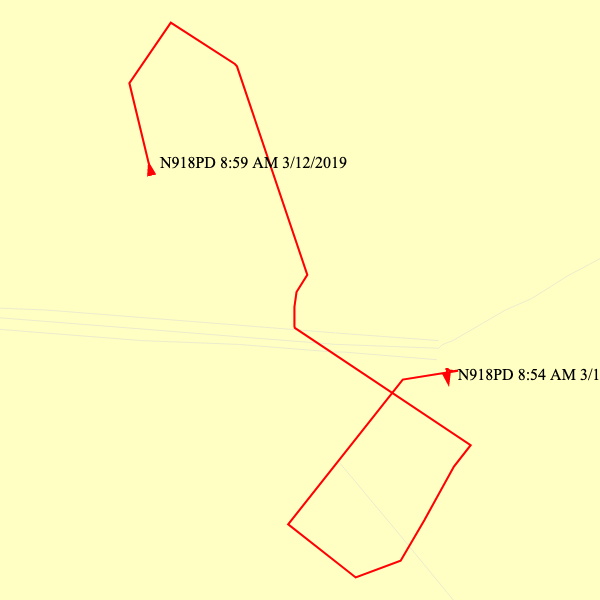

hand_coded_training_data/hover_train_png_more/ACB5AC_2019-03-09_23_49_28_2019-03-09_23_54_16.png
actual: False; predicted: True


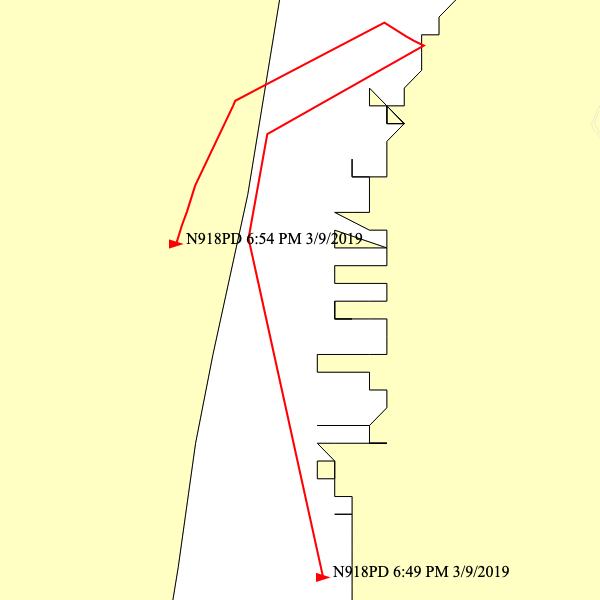

hand_coded_training_data/hover_train_png_more/ACB5AC_2019-03-10_04_58_49_2019-03-10_05_03_48.png
actual: False; predicted: True


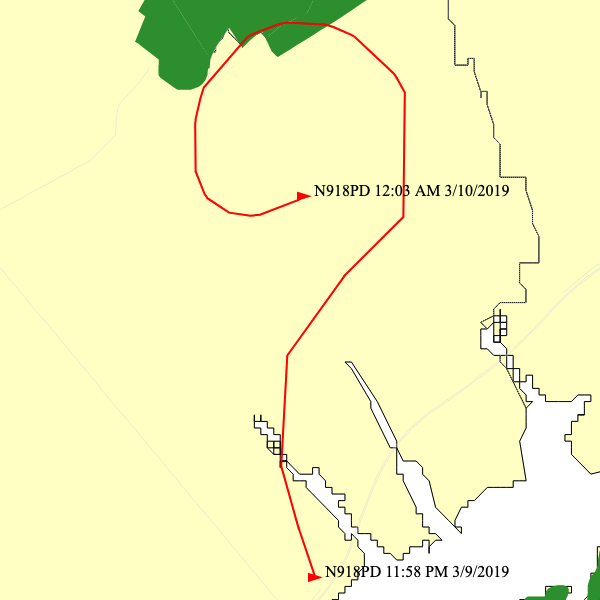

hand_coded_training_data/hover_train_png_more/ACB5AC_2019-03-12_05_26_27_2019-03-12_05_28_41.png
actual: True; predicted: False


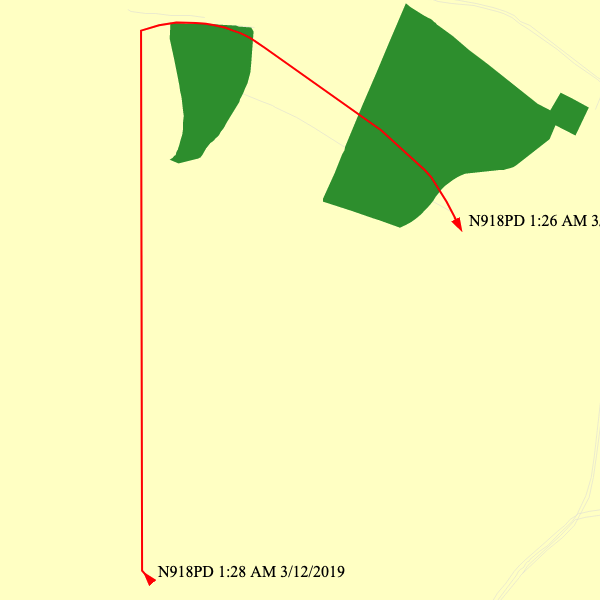

hand_coded_training_data/hover_train_png_more/ACB1F5_2019-03-05_05_15_42_2019-03-05_05_20_41.png
actual: False; predicted: True


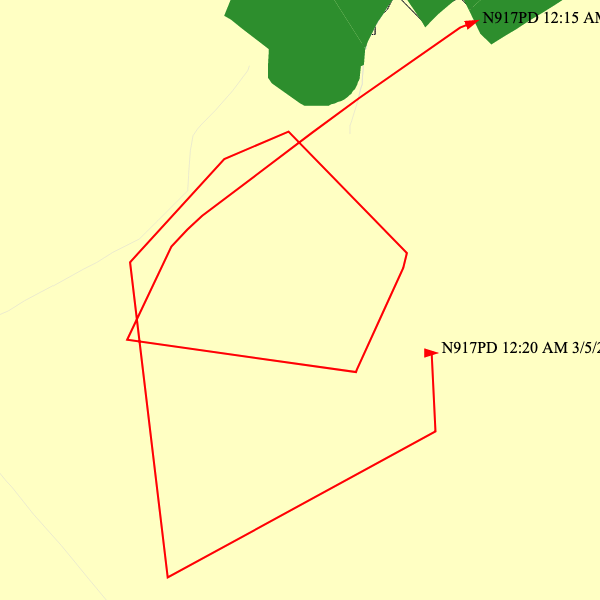

hand_coded_training_data/hover_train_png_all/ACB5AC_2019-02-05_01_36_15_2019-02-05_01_41_11.png
actual: False; predicted: True


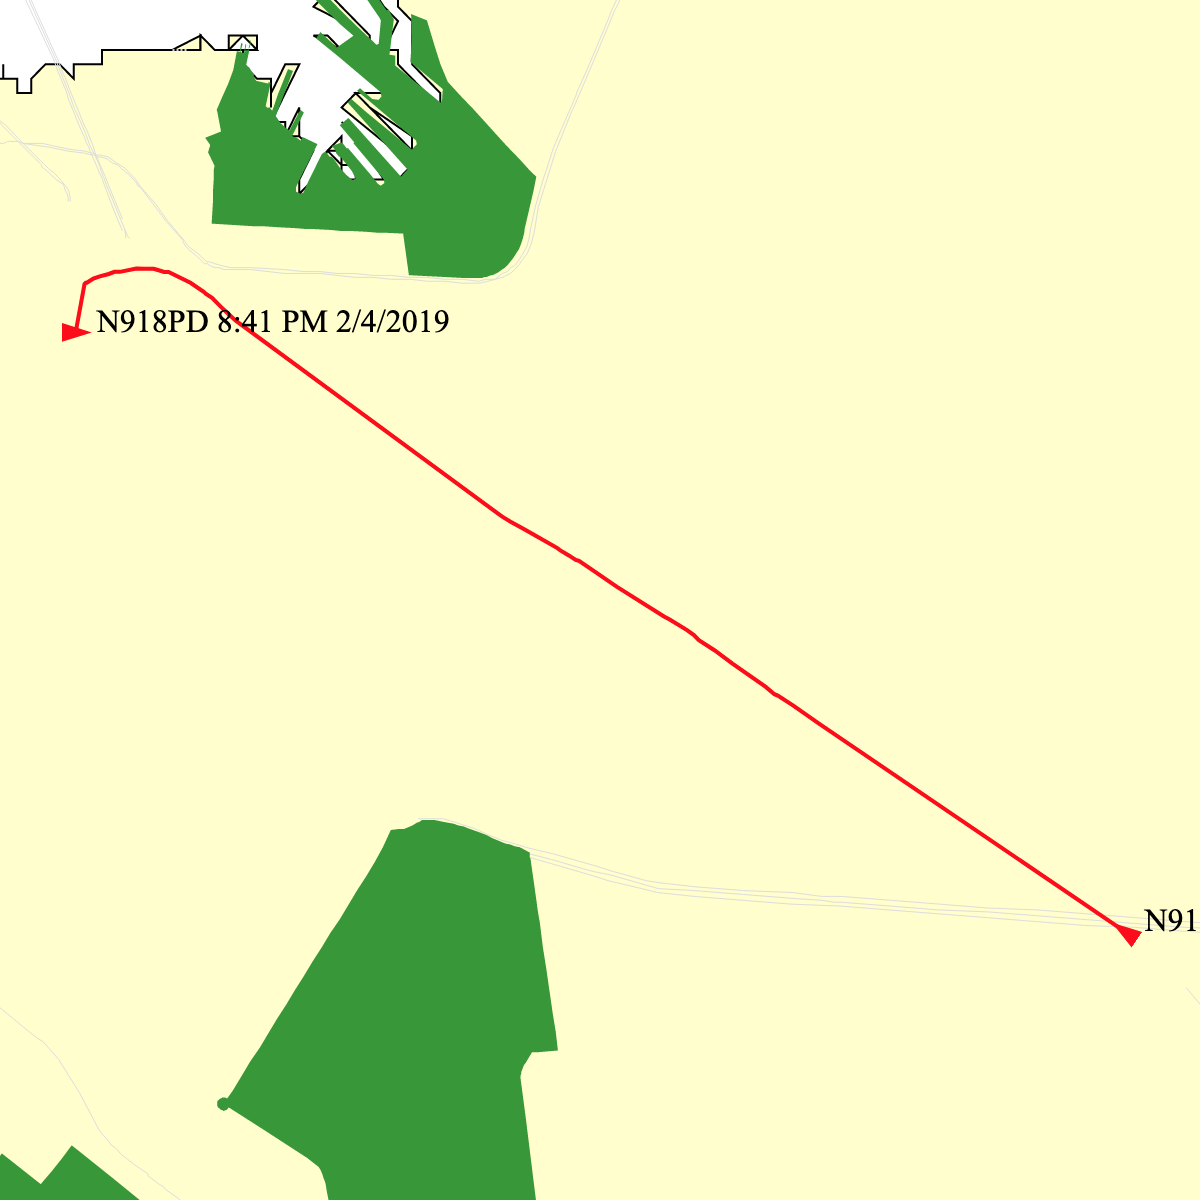

hand_coded_training_data/hover_train_png_more/ACB5AC_2019-03-09_23_56_57_2019-03-10_00_01_54.png
actual: False; predicted: True


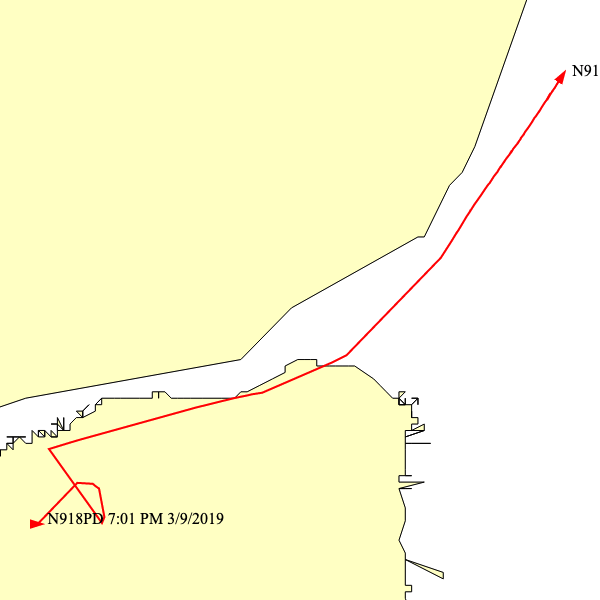

hand_coded_training_data/hover_train_png_even_more/A65CA8_2019-03-13_17_31_03_2019-03-13_17_35_59.png
actual: False; predicted: True


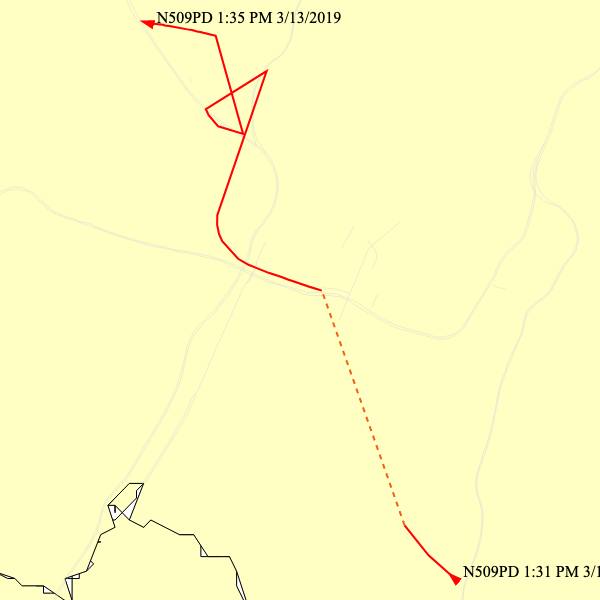

hand_coded_training_data/hover_train_png_all/ACB5AC_2019-02-03_14_55_12_2019-02-03_14_59_06.png
actual: False; predicted: True


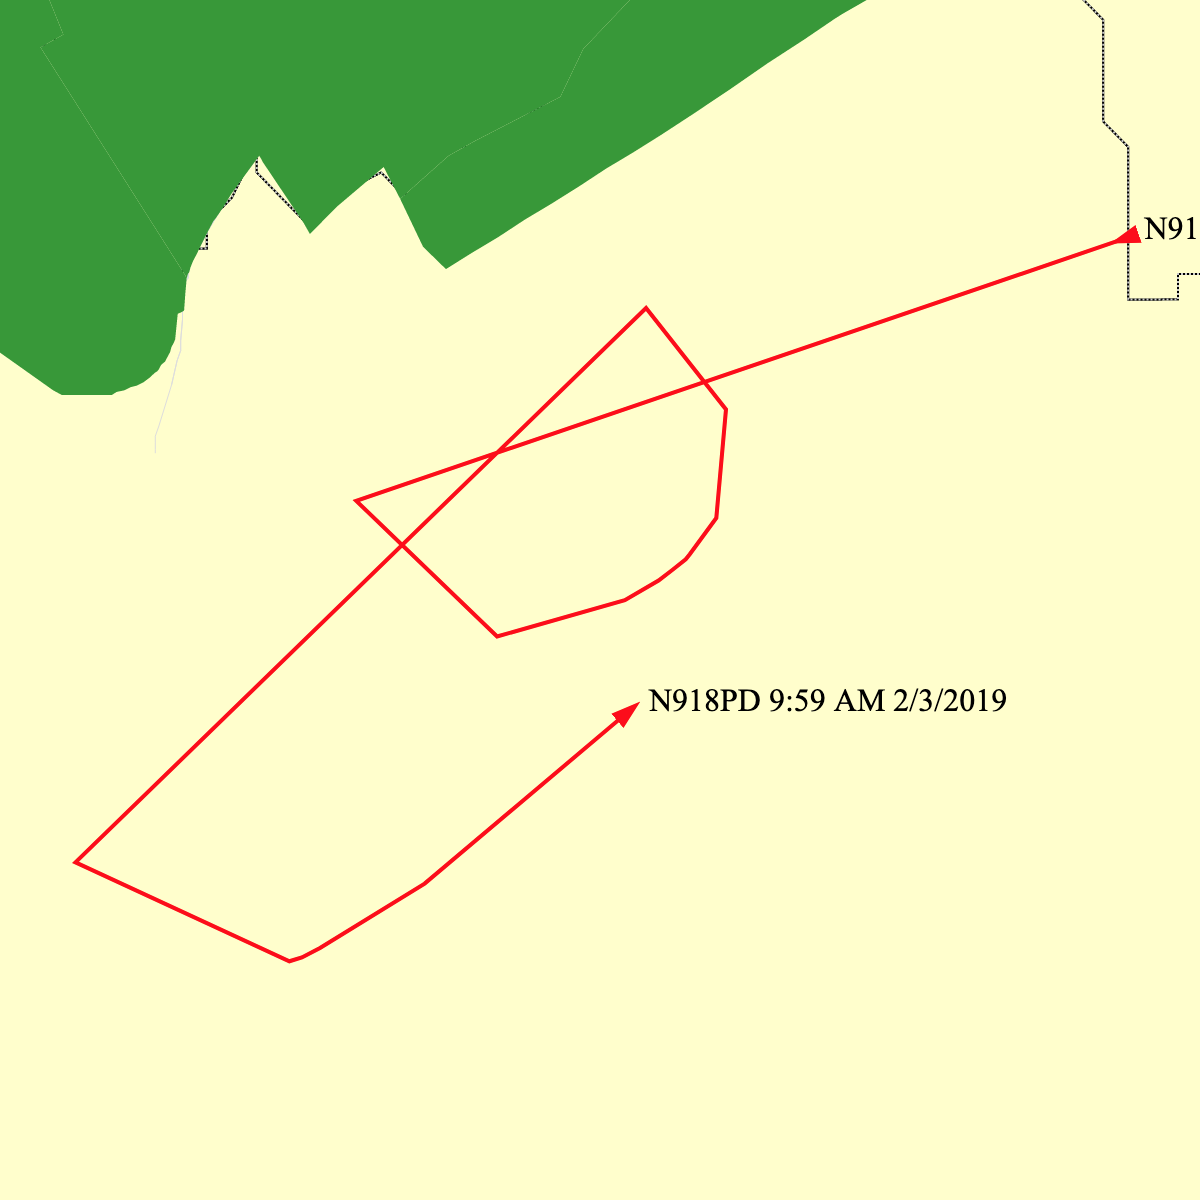

hand_coded_training_data/hover_train_png_more/ACBF73_2019-02-16_09_42_10_2019-02-16_09_45_50.png
actual: False; predicted: True


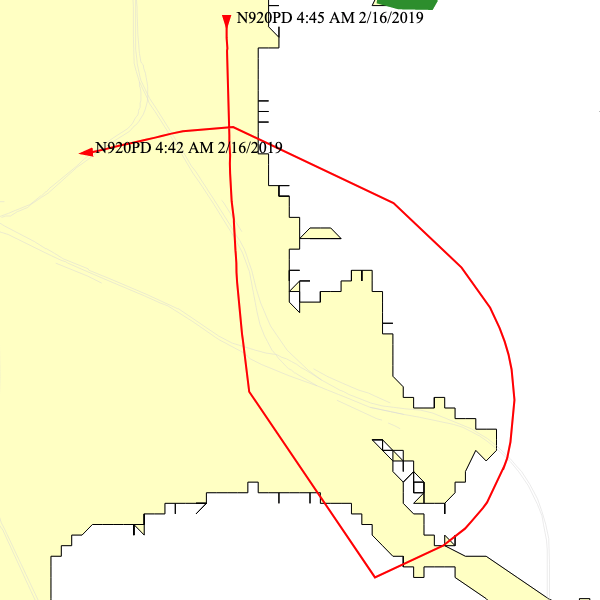

hand_coded_training_data/hover_train_png_more/ACB1F5_2019-03-06_18_13_28_2019-03-06_18_18_07.png
actual: False; predicted: True


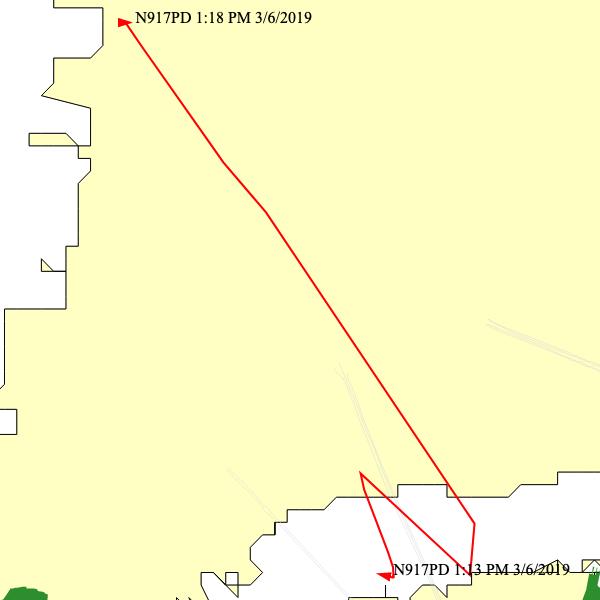

hand_coded_training_data/hover_train_png_more/ACB5AC_2019-03-10_00_01_59_2019-03-10_00_04_40.png
actual: False; predicted: True


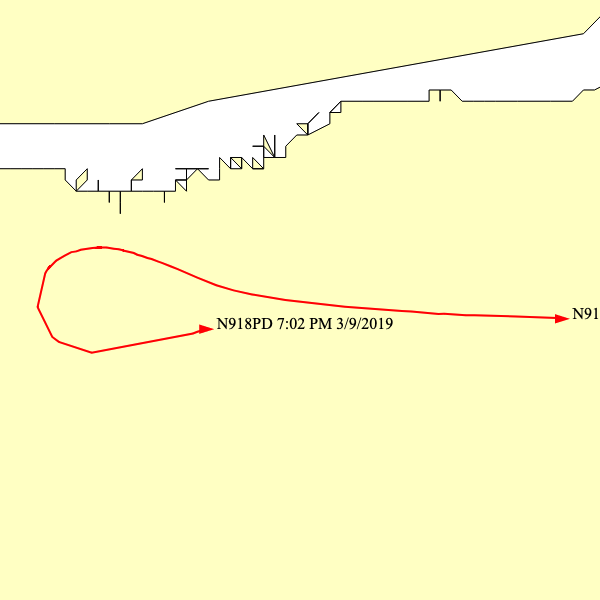

In [17]:
from IPython.display import Image, display

for row, pred in zip(test_df.values, predicted_labels):
    if pred != row[5]:
        print(row[2])
        print("actual: {}; predicted: {}".format(row[5], pred))
        display(Image(row[2], width=400))
